# Introduction
This is a project aimed at making informed decisions on where to plant specific crops in Maji Ndogo, considering factors like rainfall, soil type and others.  
  
  We have an array of variables like soil fertility, climatic conditions as well as geographic data. By understanding these elements, we will be in a position to recommend the best locations for different crops.  
  
  Our data is in a SQLite database, and split into tables. We will import it in a dataframe and dive deep into it, looking for patterns and correlations. Each clue in the data will lead us closer to understanding the best farming practices for Maji Ndogo.


# Data Dictionary
**1. Geographic features**

- **Field_ID:** A unique identifier for each field (BigInt).
 
- **Elevation:** The elevation of the field above sea level in metres (Float).

- **Latitude:** Geographical latitude of the field in degrees (Float).

- **Longitude:** Geographical longitude of the field in degrees (Float).

- **Location:** Province the field is in (Text).

- **Slope:** The slope of the land in the field (Float).

**2. Weather features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Rainfall:** Amount of rainfall in the area in mm (Float).

- **Min_temperature_C:** Average minimum temperature recorded in Celsius (Float).

- **Max_temperature_C:** Average maximum temperature recorded in Celsius (Float).

- **Ave_temps:** Average temperature in Celcius (Float).

**3. Soil and crop features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Soil_fertility:** A measure of soil fertility where 0 is infertile soil, and 1 is very fertile soil (Float).

- **Soil_type:** Type of soil present in the field (Text).

- **pH:** pH level of the soil, which is a measure of how acidic/basic the soil is (Float).

**4. Farm management features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Pollution_level:** Level of pollution in the area where 0 is unpolluted and 1 is very polluted (Float).

- **Plot_size:** Size of the plot in the field (Ha) (Float).

- **Chosen_crop:** Type of crop chosen for cultivation (Text).

- **Annual_yield:** Annual yield from the field (Float). This is the total output of the field. The field size and type of crop will affect the Annual Yield

- **Standard_yield:** Standardised yield expected from the field, normalised per crop (Float). This is independent of field size, or crop type. Multiplying this number by the field size, and average crop yield will give the Annual_Yield.

# Importing The Data
We're dealing with a SQLite database, `Maji_Ndogo_farm_survey.db`, which contains multiple tables. We'll need to join these tables on a common key to create a comprehensive dataset for our analysis. The common key in our case is `Field_ID`.

In [1]:
# Importing the necessary libraries and modules
import pandas as pd
from sqlalchemy import create_engine, text 
import matplotlib.pyplot as plt
import seaborn as sb
import math

# Create an engine for the databaseb
engine = create_engine('sqlite:///Maji_Ndogo_farm_survey_small.db')

In [2]:
# Test the connection by printing out table names
with engine.connect() as connection:
    result = connection.execute(text("SELECT name FROM sqlite_master WHERE type='table';"))
    for row in result:
        print(row)

('geographic_features',)
('weather_features',)
('soil_and_crop_features',)
('farm_management_features',)


Next, we'll write an SQL query to join our tables, using Field_ID.

In [3]:
sql_query = """
SELECT *
FROM geographic_features gf
JOIN weather_features wf
ON gf.field_ID= wf.field_ID
JOIN soil_and_crop_features scf
ON  wf.field_ID = scf.field_ID
JOIN farm_management_features fmf
ON scf.field_ID = fmf.field_ID;
"""

With our engine and query ready, we'll use `Pandas` to execute the query. The `pd.read_sql_query` function fetches the data and loads it into a DataFrame.

In [4]:
with engine.connect() as connection:
    data = pd.read_sql_query(text(sql_query), connection)

Let's check the dataframe to see if it is loaded correctly

In [5]:
data.head()

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Field_ID,Rainfall,Min_temperature_C,Max_temperature_C,...,Field_ID,Soil_fertility,Soil_type,pH,Field_ID,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,40734,1125.2,-3.1,33.1,...,40734,0.62,Sandy,6.169393,40734,0.085267,1.3,0.751354,cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,30629,1450.7,-3.9,30.6,...,30629,0.64,Volcanic,5.676648,30629,0.399684,2.2,1.069865,cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,39924,2208.9,-1.8,28.4,...,39924,0.69,Volcanic,5.331993,39924,0.358029,3.4,2.208801,tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,5754,328.8,-5.8,32.2,...,5754,0.54,Loamy,5.328150,5754,0.286687,2.4,1.277635,cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,14146,785.2,-2.5,31.0,...,14146,0.72,Sandy,5.721234,14146,0.043190,1.5,0.832614,wheat,0.555076


# Exploratory Data Analysis

In [6]:
data.shape

(5654, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Field_ID           5654 non-null   int64  
 1   Elevation          5654 non-null   float64
 2   Latitude           5654 non-null   float64
 3   Longitude          5654 non-null   float64
 4   Location           5654 non-null   object 
 5   Slope              5654 non-null   float64
 6   Field_ID           5654 non-null   int64  
 7   Rainfall           5654 non-null   float64
 8   Min_temperature_C  5654 non-null   float64
 9   Max_temperature_C  5654 non-null   float64
 10  Ave_temps          5654 non-null   float64
 11  Field_ID           5654 non-null   int64  
 12  Soil_fertility     5654 non-null   float64
 13  Soil_type          5654 non-null   object 
 14  pH                 5654 non-null   float64
 15  Field_ID           5654 non-null   int64  
 16  Pollution_level    5654 

In [8]:
data.describe()

,Field_ID,Elevation,Latitude,Longitude,Slope,Field_ID,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Field_ID,Soil_fertility,pH,Field_ID,Pollution_level,Plot_size,Crop_type,Standard_yield
count,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5.654000e+03,5654.000000,5654.000000,5654.000000
mean,22632.733817,625.468485,-7.026330,-4.365755,11.742669,22632.733817,1201.943244,-4.411956,30.857057,13.222550,22632.733817,0.619308,5.607073,22632.733817,2.231923e-01,3.923965,2.090399,0.534405
std,13133.762515,213.768160,3.515839,2.706603,9.540599,13133.762515,499.782824,1.534330,1.884682,0.801636,13133.762515,0.044791,0.789215,13133.762515,2.237976e-01,3.463855,1.935000,0.111806
min,1.000000,-878.860800,-15.009038,-10.015722,0.097316,1.000000,103.100000,-9.700000,24.500000,10.250000,1.000000,0.510000,3.700337,1.000000,1.013245e-10,0.500000,0.172226,0.170717
25%,11463.250000,520.125410,-9.674298,-6.708209,4.860120,11463.250000,773.175000,-5.500000,29.600000,12.700000,11463.250000,0.590000,5.030630,11463.250000,5.133734e-02,1.500000,0.767032,0.460386
50%,22615.500000,661.308975,-7.205178,-4.463785,9.104626,22615.500000,1200.600000,-4.300000,30.800000,13.200000,22615.500000,0.620000,5.602896,22615.500000,1.647056e-01,2.800000,1.446648,0.528836
75%,34077.750000,763.366200,-4.182984,-2.015527,15.953242,34077.750000,1625.425000,-3.300000,32.100000,13.750000,34077.750000,0.650000,6.162058,34077.750000,3.058885e-01,4.700000,2.530662,0.599942
max,45153.000000,1122.252100,0.260756,1.696276,79.865960,45153.000000,2470.900000,-0.100000,37.800000,17.300000,45153.000000,0.820000,7.499959,45153.000000,9.954134e-01,15.000000,12.695224,0.898037


In [9]:
# Look at the Categorical/ Non-numeric columns
non_num_cols = ["Location", "Soil_type", "Annual_yield"]
for col in non_num_cols:
    print(data[col].value_counts())
    print("............................")

Location
Rural_Kilimani    2020
Rural_Hawassa     1734
Rural_Sokoto       914
Rural_Akatsi       727
Rural_Amanzi       259
Name: count, dtype: int64
............................
Soil_type
Sandy       1563
Volcanic    1329
Silt        1315
Loamy        973
Rocky        304
Peaty        170
Name: count, dtype: int64
............................
Annual_yield
wheat       1316
tea          895
potato       823
cassava      660
banana       633
coffee       607
maize        399
rice         265
wheat         13
wheatn        13
tea            9
teaa           9
cassaval       6
cassava        6
Name: count, dtype: int64
............................


# Data Cleanup

I've noticed some errors in the data:  
1. There are a couple of Field_ID columns in our DataFrame that we need to remove.
2. There are some swapped column names
3. Some of the crop types contain spelling errors.
4. The `Elevation` and `Min_temperature` columns contain some negative values, which are not plausible.

   We'll then drop the `Ave_temps` since it doesn't have much significance in our analysis.

In [10]:
data.columns = data.columns.str.lower()

In [11]:
# Drop the Field Id columns everywhere they appear
data.drop(columns = 'field_id', inplace = True)

# Correct the swapped column names
data["crop_type"], data["annual_yield"] = data["annual_yield"], data["crop_type"]

# Correct crop type spelling errors
data['crop_type'] = data["crop_type"].apply(lambda x: x.strip())
data["crop_type"] = data["crop_type"].replace({
    "cassaval" : "cassava",
    "wheatn" : "wheat",
    "teaa" : "tea"
})

# Remove negative values by taking absolute values
data['elevation'] = data['elevation'].abs()
data["min_temperature_c"] = data["min_temperature_c"].abs()

# Drop irrelevant columns
data.drop(columns=["ave_temps"], inplace=True)

## Final Checkup

In [12]:
data.head()

,elevation,latitude,longitude,location,slope,rainfall,min_temperature_c,max_temperature_c,soil_fertility,soil_type,ph,pollution_level,plot_size,crop_type,annual_yield,standard_yield
0,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,3.1,33.1,0.62,Sandy,6.169393,0.085267,1.3,cassava,0.751354,0.577964
1,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,3.9,30.6,0.64,Volcanic,5.676648,0.399684,2.2,cassava,1.069865,0.486302
2,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,1.8,28.4,0.69,Volcanic,5.331993,0.358029,3.4,tea,2.208801,0.649647
3,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,5.8,32.2,0.54,Loamy,5.328150,0.286687,2.4,cassava,1.277635,0.532348
4,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,2.5,31.0,0.72,Sandy,5.721234,0.043190,1.5,wheat,0.832614,0.555076


In [13]:
data.shape

(5654, 16)

In [14]:
# Final checkup
data['crop_type'].unique()

array(['cassava', 'tea', 'wheat', 'potato', 'banana', 'coffee', 'rice',
       'maize'], dtype=object)

In [15]:
data['elevation'].min()

35.910797

In [16]:
data['annual_yield'].dtype

dtype('float64')

# Understanding The Data

In [17]:
data.describe()

,elevation,latitude,longitude,slope,rainfall,min_temperature_c,max_temperature_c,soil_fertility,ph,pollution_level,plot_size,annual_yield,standard_yield
count,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5.654000e+03,5654.000000,5654.000000,5654.000000
mean,637.790709,-7.026330,-4.365755,11.742669,1201.943244,4.411956,30.857057,0.619308,5.607073,2.231923e-01,3.923965,2.090399,0.534405
std,173.573934,3.515839,2.706603,9.540599,499.782824,1.534330,1.884682,0.044791,0.789215,2.237976e-01,3.463855,1.935000,0.111806
min,35.910797,-15.009038,-10.015722,0.097316,103.100000,0.100000,24.500000,0.510000,3.700337,1.013245e-10,0.500000,0.172226,0.170717
25%,525.611413,-9.674298,-6.708209,4.860120,773.175000,3.300000,29.600000,0.590000,5.030630,5.133734e-02,1.500000,0.767032,0.460386
50%,663.058585,-7.205178,-4.463785,9.104626,1200.600000,4.300000,30.800000,0.620000,5.602896,1.647056e-01,2.800000,1.446648,0.528836
75%,764.299550,-4.182984,-2.015527,15.953242,1625.425000,5.500000,32.100000,0.650000,6.162058,3.058885e-01,4.700000,2.530662,0.599942
max,1122.252100,0.260756,1.696276,79.865960,2470.900000,9.700000,37.800000,0.820000,7.499959,9.954134e-01,15.000000,12.695224,0.898037


array([[<Axes: title={'center': 'elevation'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'rainfall'}>,
        <Axes: title={'center': 'min_temperature_c'}>,
        <Axes: title={'center': 'max_temperature_c'}>,
        <Axes: title={'center': 'soil_fertility'}>],
       [<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'pollution_level'}>,
        <Axes: title={'center': 'plot_size'}>,
        <Axes: title={'center': 'annual_yield'}>],
       [<Axes: title={'center': 'standard_yield'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

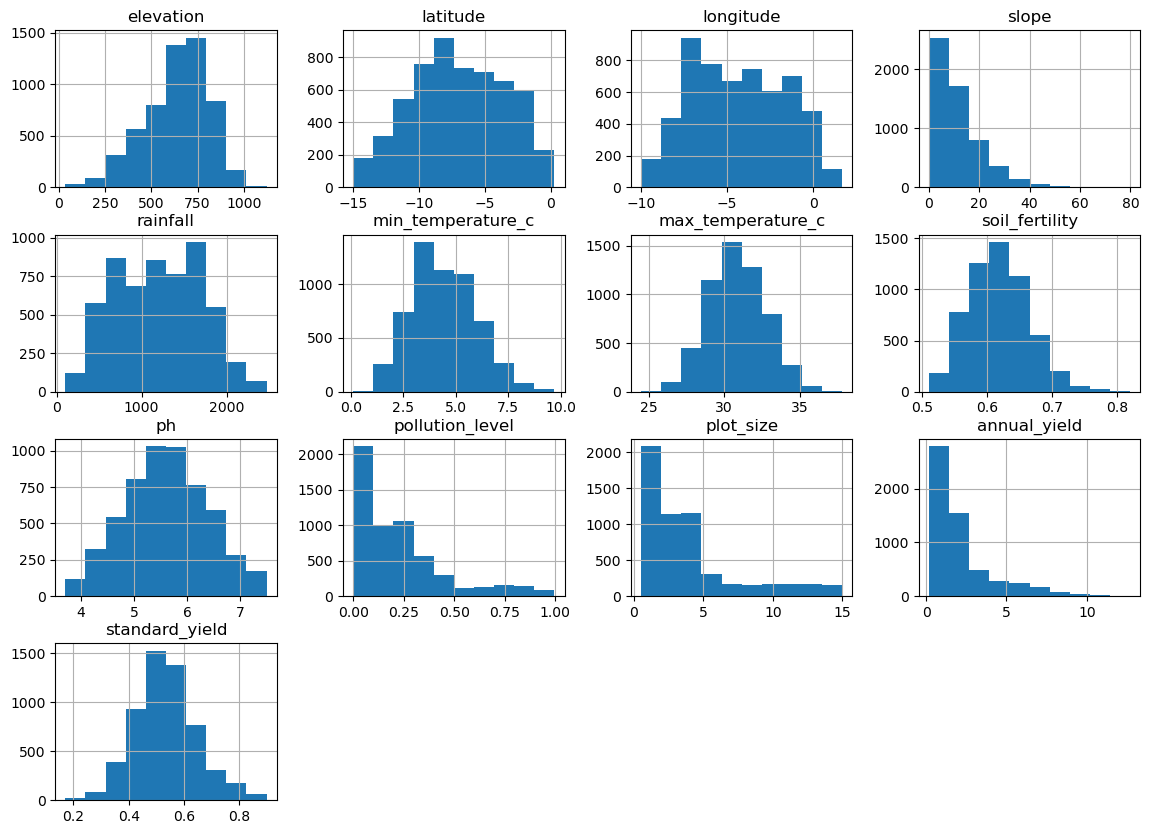

In [18]:
data.hist(figsize= (14, 10), layout=(4, 4))

In [19]:
data.corr(numeric_only=True)

,elevation,latitude,longitude,slope,rainfall,min_temperature_c,max_temperature_c,soil_fertility,ph,pollution_level,plot_size,annual_yield,standard_yield
elevation,1.000000,0.546737,0.345139,0.081837,-0.238518,-0.956418,-0.605884,-0.146844,-0.430787,0.285086,-0.032261,0.005033,0.129248
latitude,0.546737,1.000000,0.257728,0.103381,-0.756442,-0.337544,-0.340948,-0.566838,-0.220201,0.289556,-0.064183,-0.045701,0.061724
longitude,0.345139,0.257728,1.000000,-0.078865,0.146665,-0.398923,-0.223253,0.071705,-0.315035,0.476562,0.065011,0.088318,0.085343
slope,0.081837,0.103381,-0.078865,1.000000,-0.131472,-0.044370,-0.046567,0.550326,-0.087969,0.010879,-0.603773,-0.571007,0.056991
rainfall,-0.238518,-0.756442,0.146665,-0.131472,1.000000,-0.052469,0.155806,0.752914,0.025182,-0.198268,0.092198,0.098114,0.039217
min_temperature_c,-0.956418,-0.337544,-0.398923,-0.044370,-0.052469,1.000000,0.576769,-0.072797,0.435366,-0.235310,0.005503,-0.034617,-0.144233
max_temperature_c,-0.605884,-0.340948,-0.223253,-0.046567,0.155806,0.576769,1.000000,0.099502,0.255306,-0.161467,0.018017,-0.011637,-0.111649
soil_fertility,-0.146844,-0.566838,0.071705,0.550326,0.752914,-0.072797,0.099502,1.000000,-0.035415,-0.160151,-0.320810,-0.294160,0.070205
ph,-0.430787,-0.220201,-0.315035,-0.087969,0.025182,0.435366,0.255306,-0.035415,1.000000,-0.140758,0.055303,0.003464,-0.196613
pollution_level,0.285086,0.289556,0.476562,0.010879,-0.198268,-0.235310,-0.161467,-0.160151,-0.140758,1.000000,-0.013718,-0.072318,-0.285761


# Identifying Optimal Conditions for Crop Performance

  To understand the best environmental conditions for each crop, we need a way to define what **"high performance"** means in a statistically meaningful way. Rather than selecting only the highest yielding record per crop and location - which could be an outlier, we need a more robust thresholding method to identify consistently top performing records.

  ## Defining Success

  For each crop within each location, we will calculate the 50th percentile(median) and the 75th percentile of the `Standard_yield`. We will then compute the midpoint between these two values using the formula:  
  **Threshold = (Q2 + Q3) / 2**  

  This threshold captures yields that are **better than average**, but not so exclusive that they only include extreme outliers. It allows us to focus on consistently high-performing rows for each crop-location combination.

  ### Why This Threshold?
  - It is statistically grounded and not based on an arbitrary value
  - It is locally adaptive. Each crop group gets its own context aware value.

In [20]:
def filter_top_performers(group):
    q2 = group["standard_yield"].quantile(0.50)
    q3 = group["standard_yield"].quantile(0.75)
    threshold = (q2 + q3) / 2
    return group[group["standard_yield"] >= threshold]

# Apply the function to each group
top_data = (
    data.groupby(["crop_type"], group_keys=False)
         .apply(filter_top_performers)
)

# Sneak peek
top_data.iloc[:10]

,elevation,latitude,longitude,location,slope,rainfall,min_temperature_c,max_temperature_c,soil_fertility,soil_type,ph,pollution_level,plot_size,crop_type,annual_yield,standard_yield
11,393.83450,-12.855317,-8.159821,Rural_Akatsi,36.340670,1753.3,6.3,31.8,0.74,Silt,6.254509,0.003992,1.9,banana,0.936805,0.493055
56,723.12756,-9.660780,-0.556032,Rural_Sokoto,4.783915,2010.9,2.9,30.5,0.66,Volcanic,5.792303,0.241343,4.5,banana,3.014890,0.669976
57,410.50626,-10.940397,-8.934615,Rural_Akatsi,4.675606,1846.7,5.9,30.2,0.65,Silt,5.926182,0.076414,4.3,banana,2.277241,0.529591
94,686.18730,-8.489300,1.227796,Rural_Sokoto,7.499359,1781.0,3.4,30.0,0.65,Volcanic,4.744505,0.050693,3.5,banana,1.808822,0.516806
169,639.46310,-9.120097,-1.465964,Rural_Sokoto,5.434573,1723.9,3.9,29.5,0.64,Volcanic,5.791281,0.054769,2.9,banana,1.722610,0.594004
180,629.72546,-10.039259,-9.533728,Rural_Akatsi,16.705343,1991.0,3.5,31.5,0.69,Silt,5.979547,0.127947,0.7,banana,0.445314,0.636163
234,603.40600,-8.836239,-0.177644,Rural_Sokoto,4.883698,1725.3,4.2,31.0,0.64,Silt,5.559411,0.127775,4.3,banana,2.181832,0.507403
237,687.59480,-10.151901,-9.267956,Rural_Akatsi,8.772305,2038.2,3.1,32.0,0.67,Volcanic,5.368226,0.134621,4.7,banana,2.951612,0.628002
241,505.25302,-10.926880,-9.524719,Rural_Akatsi,39.932186,1976.2,4.9,29.7,0.77,Silt,6.412576,0.022561,1.4,banana,0.819373,0.585266
250,648.79944,-9.084052,-2.646173,Rural_Hawassa,3.561046,1646.7,3.5,30.3,0.63,Volcanic,5.630260,0.018310,12.0,banana,6.866983,0.572249


## 1. Climatic and Geographic Conditions

### Box Plot + Summary Tables Analysis

In [21]:
cl_and_geo_cols = ['elevation', 'slope', 'rainfall', 'min_temperature_c', 'max_temperature_c']

top_conditions_summary =  top_data.groupby(["crop_type"])[cl_and_geo_cols].mean().reset_index()
top_conditions_summary

,crop_type,elevation,slope,rainfall,min_temperature_c,max_temperature_c
0,banana,607.933603,10.511275,1785.941102,4.142797,31.083475
1,cassava,693.548703,10.994328,1066.839130,4.023715,30.700000
2,coffee,609.294323,9.397898,1857.499545,4.066818,31.060455
3,maize,640.390846,12.468782,630.111111,4.905556,30.749306
4,potato,662.669913,14.595826,594.108651,4.741176,30.565398
5,rice,449.288461,11.030680,1609.950000,5.757447,32.031915
6,tea,727.171477,12.589250,1763.908746,3.086006,30.239650
7,wheat,620.508701,12.490081,717.785714,5.012215,30.902484


In [22]:
summary = (
    top_data.groupby("crop_type")[cl_and_geo_cols]
    .agg(["min", "max", "mean"])
)

# Flatten MultiIndex columns
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary

,elevation_min,elevation_max,elevation_mean,slope_min,slope_max,slope_mean,rainfall_min,rainfall_max,rainfall_mean,min_temperature_c_min,min_temperature_c_max,min_temperature_c_mean,max_temperature_c_min,max_temperature_c_max,max_temperature_c_mean
crop_type,,,,,,,,,,,,,,,
banana,331.46024,872.41980,607.933603,0.216506,41.381054,10.511275,158.8,2408.5,1785.941102,1.2,8.1,4.142797,26.7,35.7,31.083475
cassava,436.40424,1016.45730,693.548703,0.591842,44.894590,10.994328,268.7,1574.6,1066.839130,1.3,6.7,4.023715,26.9,35.1,30.700000
coffee,308.31696,925.69775,609.294323,0.654049,40.234947,9.397898,1209.0,2470.9,1857.499545,0.6,6.9,4.066818,26.5,35.8,31.060455
maize,344.17734,962.65515,640.390846,0.499293,72.578370,12.468782,245.6,1193.9,630.111111,1.8,7.8,4.905556,25.9,34.3,30.749306
potato,338.14935,1016.44000,662.669913,0.337027,56.112896,14.595826,210.5,1089.7,594.108651,1.3,7.8,4.741176,25.6,35.9,30.565398
rice,126.40275,652.92755,449.288461,0.292197,40.120953,11.030680,1260.3,1997.6,1609.950000,3.9,8.8,5.757447,28.1,35.4,32.031915
tea,500.10500,934.86210,727.171477,0.454257,62.283863,12.589250,1205.2,2179.7,1763.908746,1.2,5.1,3.086006,26.2,34.5,30.239650
wheat,282.86290,1003.94370,620.508701,0.097316,79.865960,12.490081,103.1,1992.3,717.785714,1.4,8.4,5.012215,25.4,35.7,30.902484


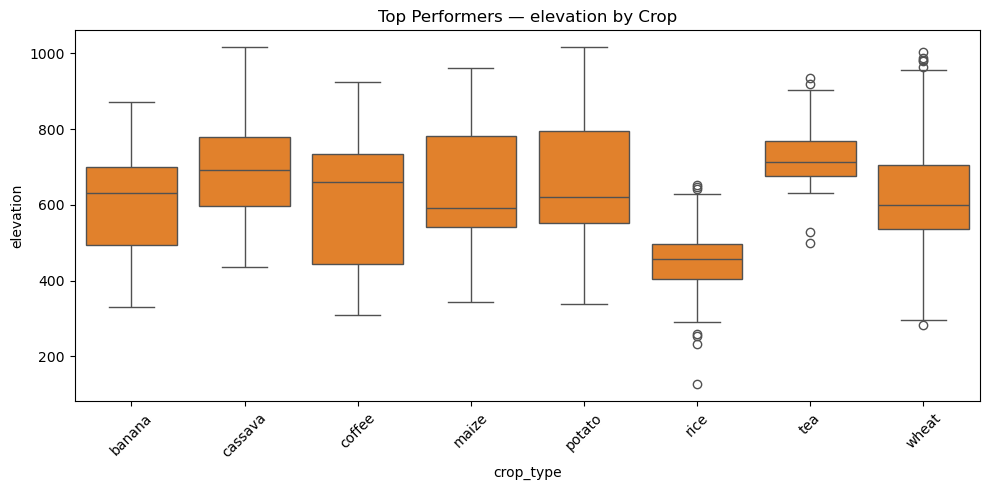

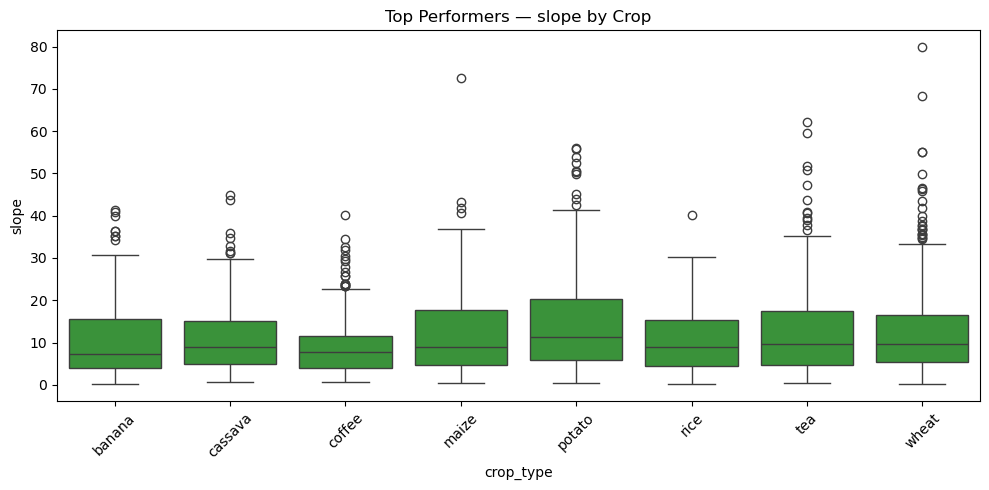

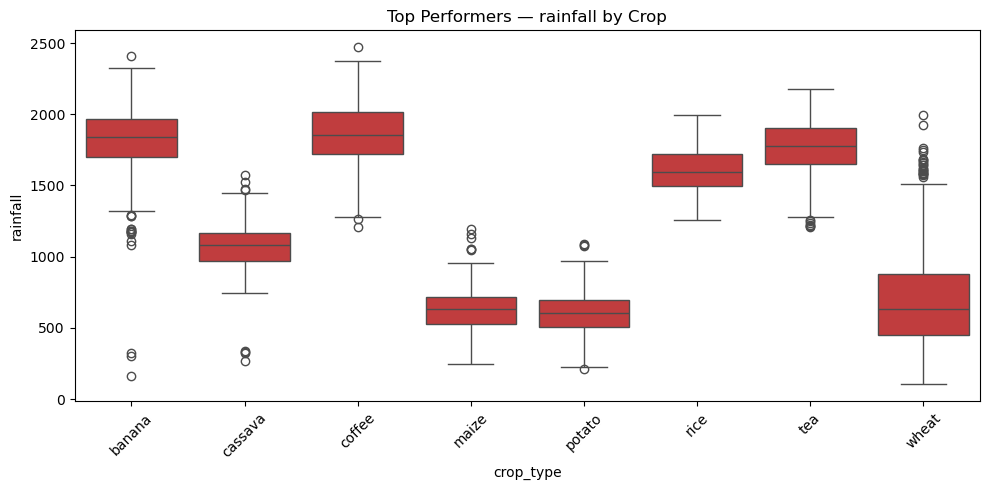

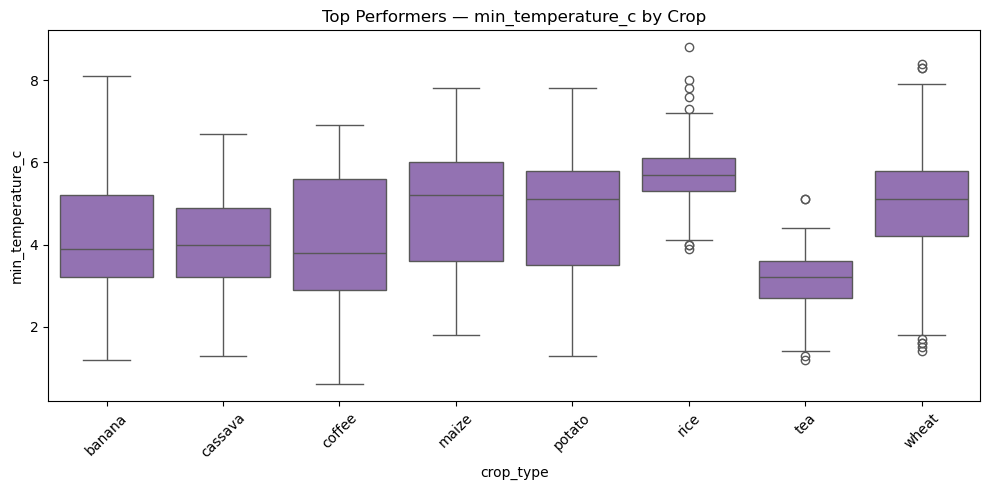

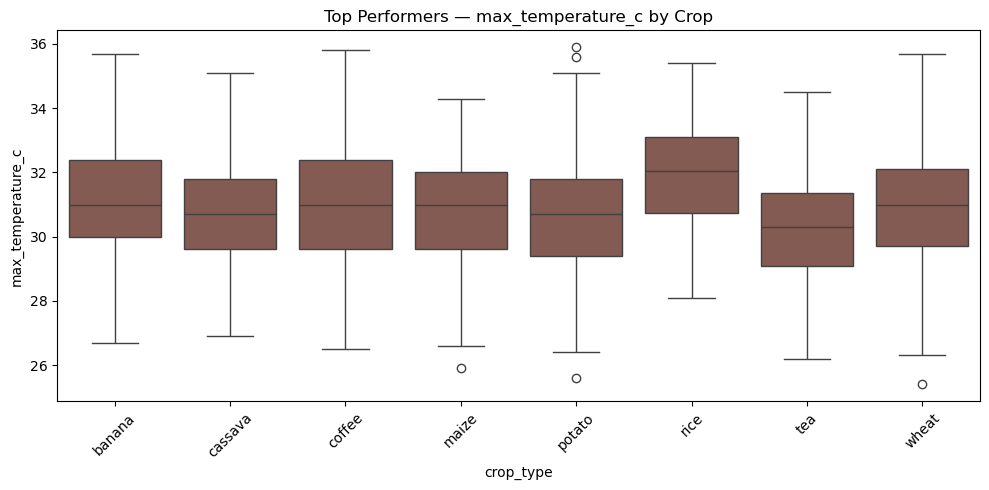

In [23]:
for i, var in enumerate(cl_and_geo_cols):
    plt.figure(figsize=(10, 5))
    color = sb.color_palette()[i+1]
    sb.boxplot(data=top_data, x="crop_type", y=var,  color=color)
    plt.title(f"Top Performers — {var} by Crop")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Key Observations: 
**ELEVATION**  
- `Cassava`and `Tea` are cultivated at consistently higher elevations. `Tea`, particularly, has a narrow IQR indicaticating a strong preference for higher elevations.
- `Rice` grows at the lowest altitudes overall. Most high-performing rice farms are located below 500m.
- `Banana` and `Coffee` show moderate elevation ranges, indicating they thrive in mid-altitude places.
- `Maize`, `Wheat`, and `Potato` show wide elevation ranges which suggests that they are adaptable to various elevations. `Wheat` however has higher variability that spans from low to high altitudes.

**SLOPE**
- `Rice` grow on mostly flat or gentle slopes.
- `Potato`, `Wheat`, `Maize` and `Tea` have the widest slope ranges. `Wheat` and `Tea` have more outliers which means they could perform in steeper farmss if properly managed.
- `Coffee` and `Cassava` are cultivated on gentle slopes.

**RAINFALL**
- `Banana`, `Coffee` and `Tea` demand high rainfall.
- `Cassava`, `Potato` and `Maize` grow well in moderate rainfall zones.
- `Wheat` is the most drought-resistant thriving even under 500m but also performs strongly upto ~1600 mm showing high adaptability.

  
**TEMPERATURE**
- Top performing `Rice` farms are located in areas of high temperature. Strong evidence since these have the highest minimum temperature and maximum temperature floors compared to other crop farms.
- Top performing `Tea` farms, on the contrary are located in regions with cooler temperatures. This is strongly highlighted by having the lowest minimum temperature and maximum temperature ceilings compared to other farms.


### KDE Distribution Analysis
To deepen the understanding of how environmental factors influence crop performance, I will create KDE plots for each crop. These visualizations will compare the distributions of our variables between:
1. All fields where a specific crop is grown
2. Top performing fields for that crop

While the boxplots helped summarize how the climatic conditions are distributed among top performers(hinting to us what might influence high performance), they didn't tell us whether these conditions are unique to top performers or also common among average/low performers. This is where our KDE plots come in.

So I'll define the two KDEs to show:
1. The baseline distribution for all plots of land growing a specific crop.
2. Another overlaying distribution for just the top-performing fields for that crop.

Comparing these two, we'll be in a position to understand whether top performers cluster around certain conditions and also how different conditions of high-yield farms compare to the general spread.

**What I expect**
- Some top-performing farms KDEs to show a clear difference from the general distribution suggesting some factors will have significant influence on yield
- Some curves will be similar suggesting small or no influence to yield.
- New emerging shapes suggesting multimodal distributions.

Let's see.

In [24]:
def kde_diff_plot(crop, vars= ['elevation', 'slope', 'rainfall', 'min_temperature_c', 'max_temperature_c']):
    cols = 2
    rows = math.ceil(len(vars)/2)
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
    fig.suptitle(f"Distribution Comparison for {crop}", fontsize=16)
    axes = axes.flatten()
    
    # Plot each variable
    for i, var in enumerate(vars):
        ax = axes[i]
        color = sb.color_palette()[i+1]
        sb.kdeplot(data=data[data['crop_type'] == crop], x=var, label=f'All {crop}', fill=True, ax=ax)
        sb.kdeplot(data=top_data[top_data['crop_type'] == crop],  x=var, label=f'Top {crop}', fill=True, color=color, ax=ax)
        ax.set_title(f"{var}")
        ax.legend()

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

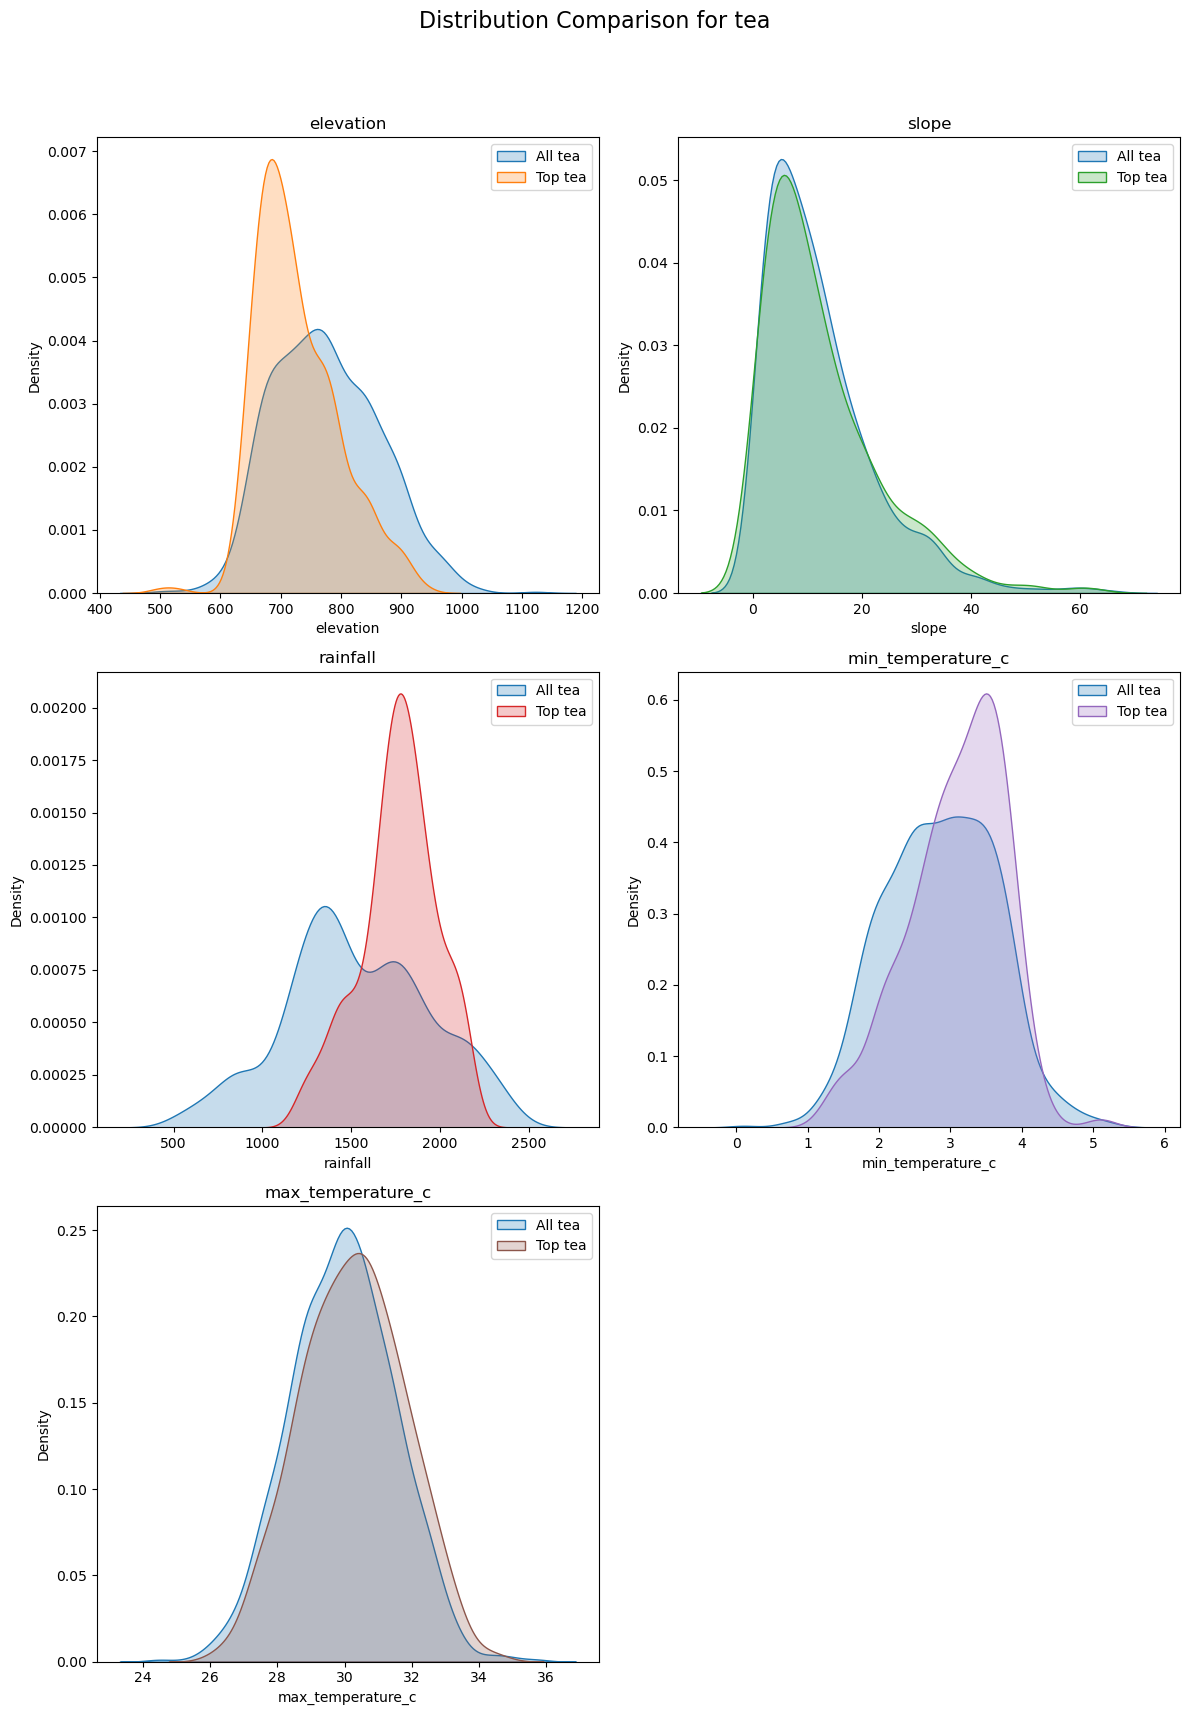

In [25]:
kde_diff_plot("tea")

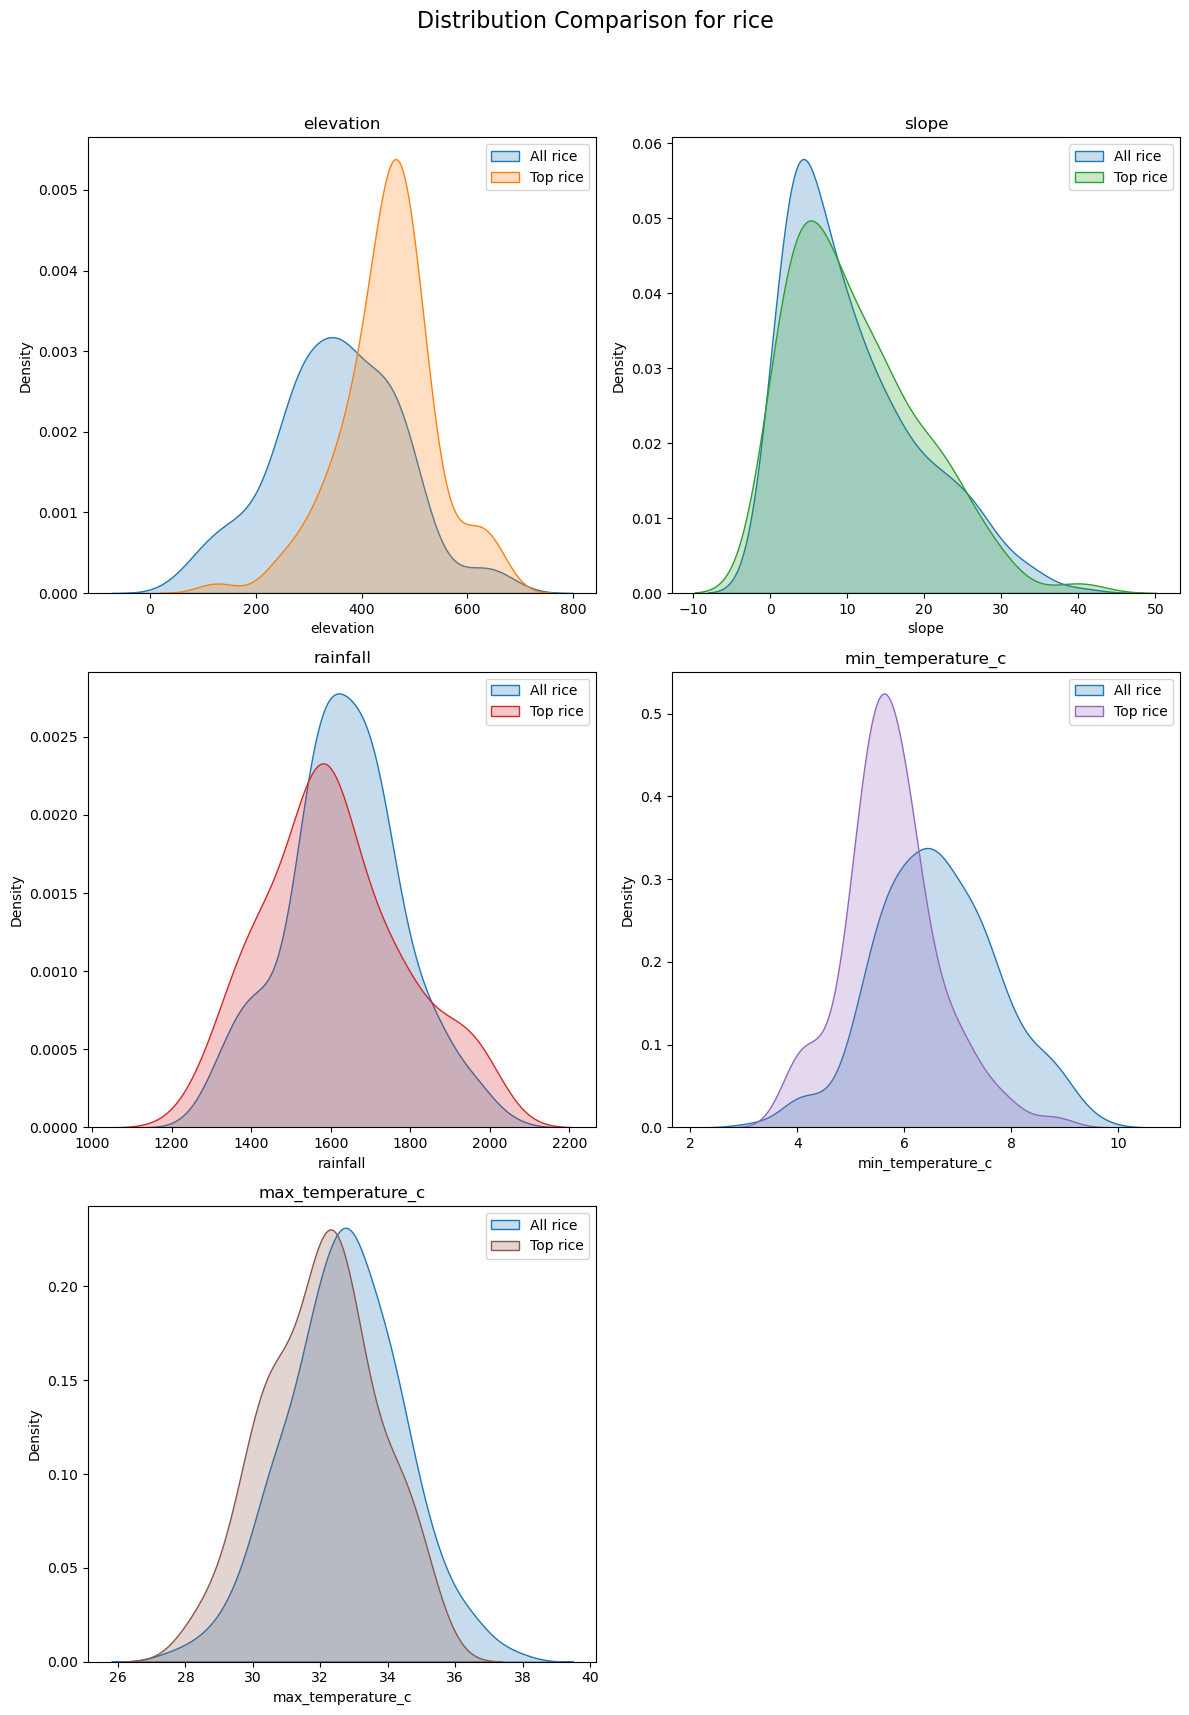

In [26]:
kde_diff_plot("rice")

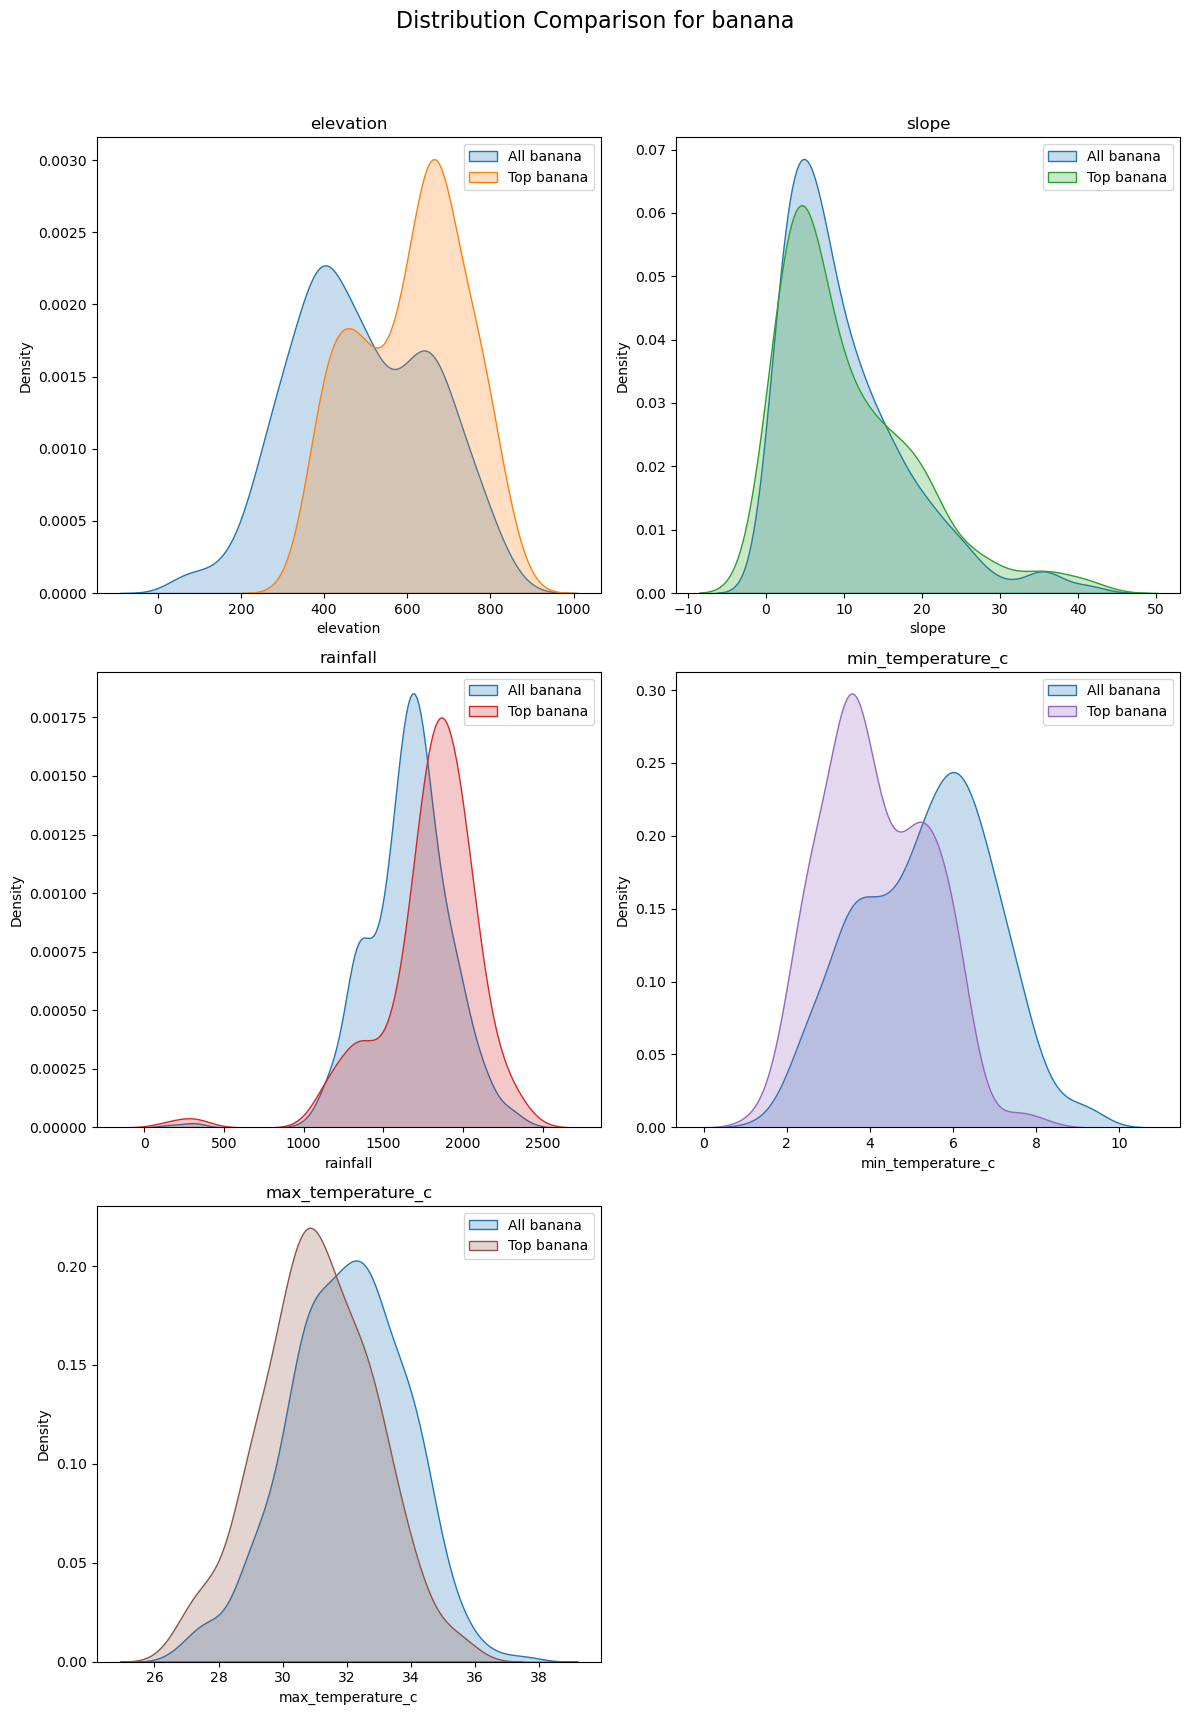

In [27]:
kde_diff_plot("banana")

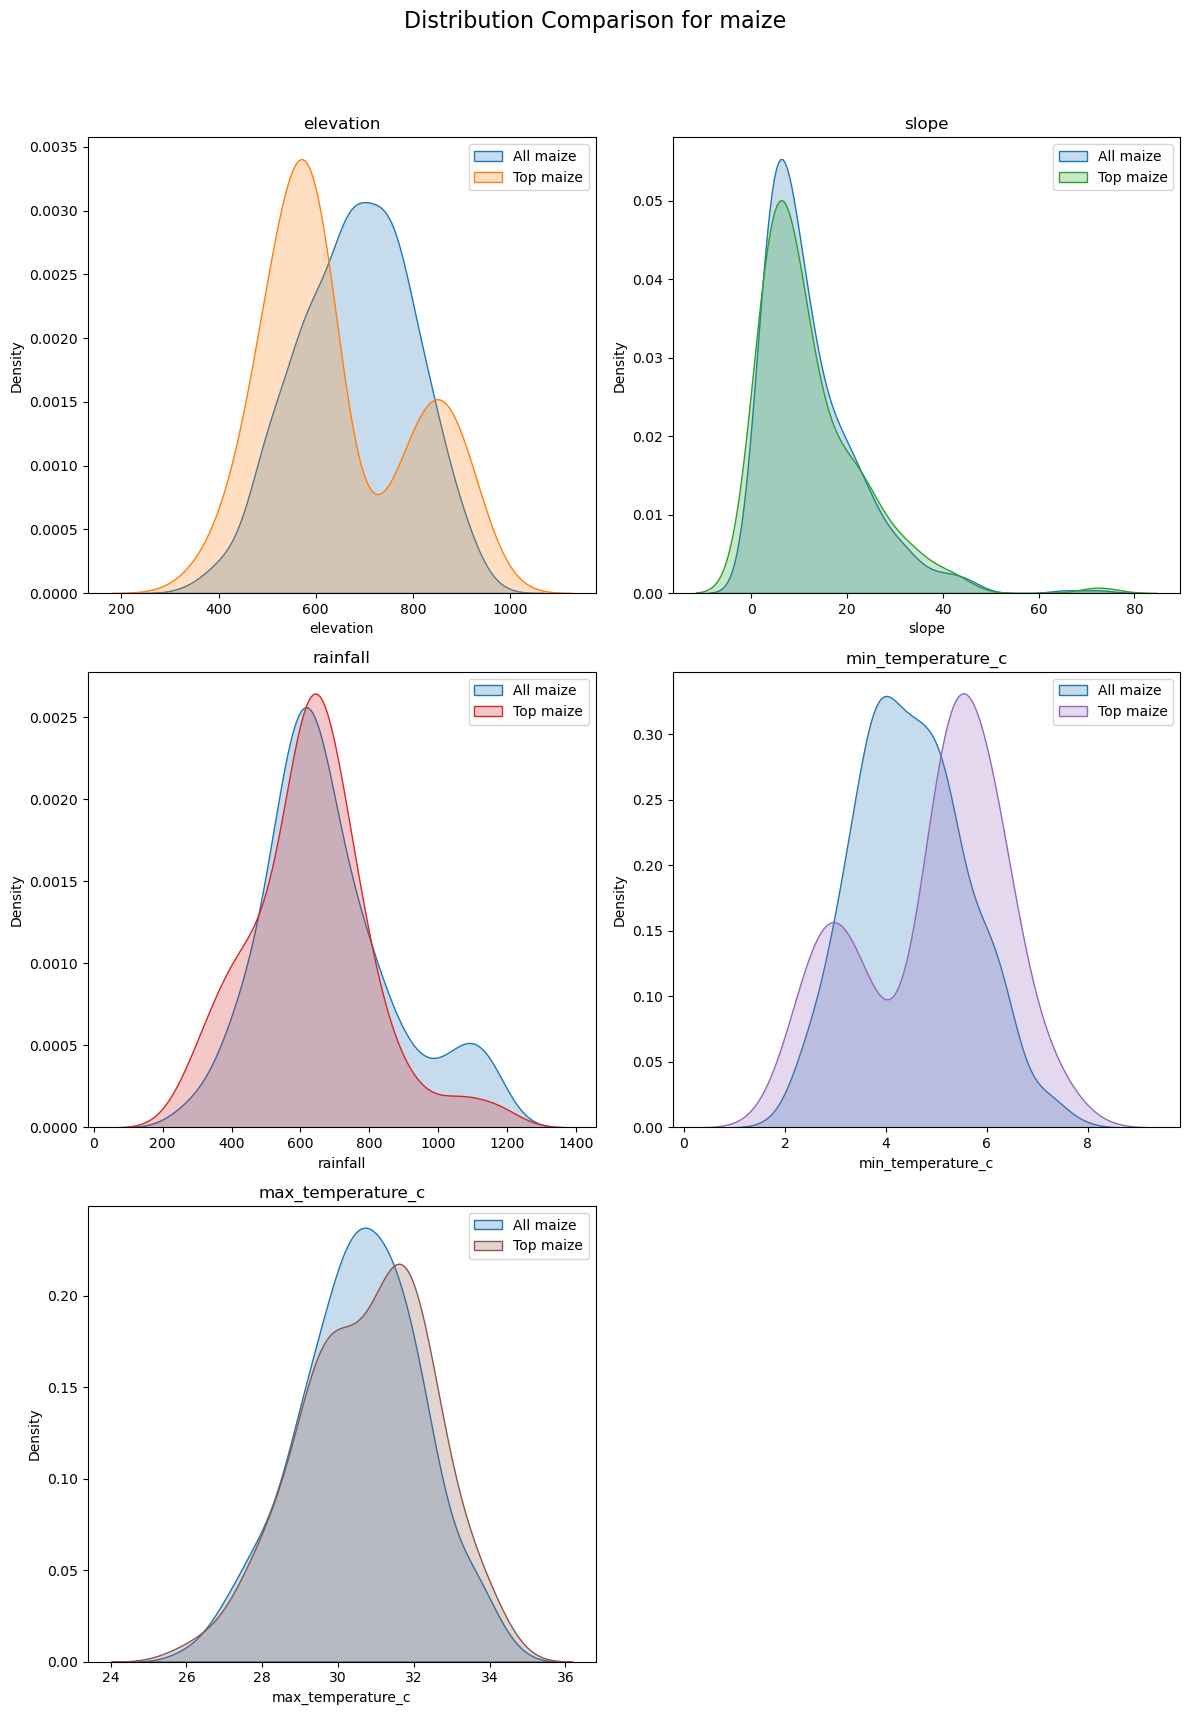

In [28]:
kde_diff_plot("maize")

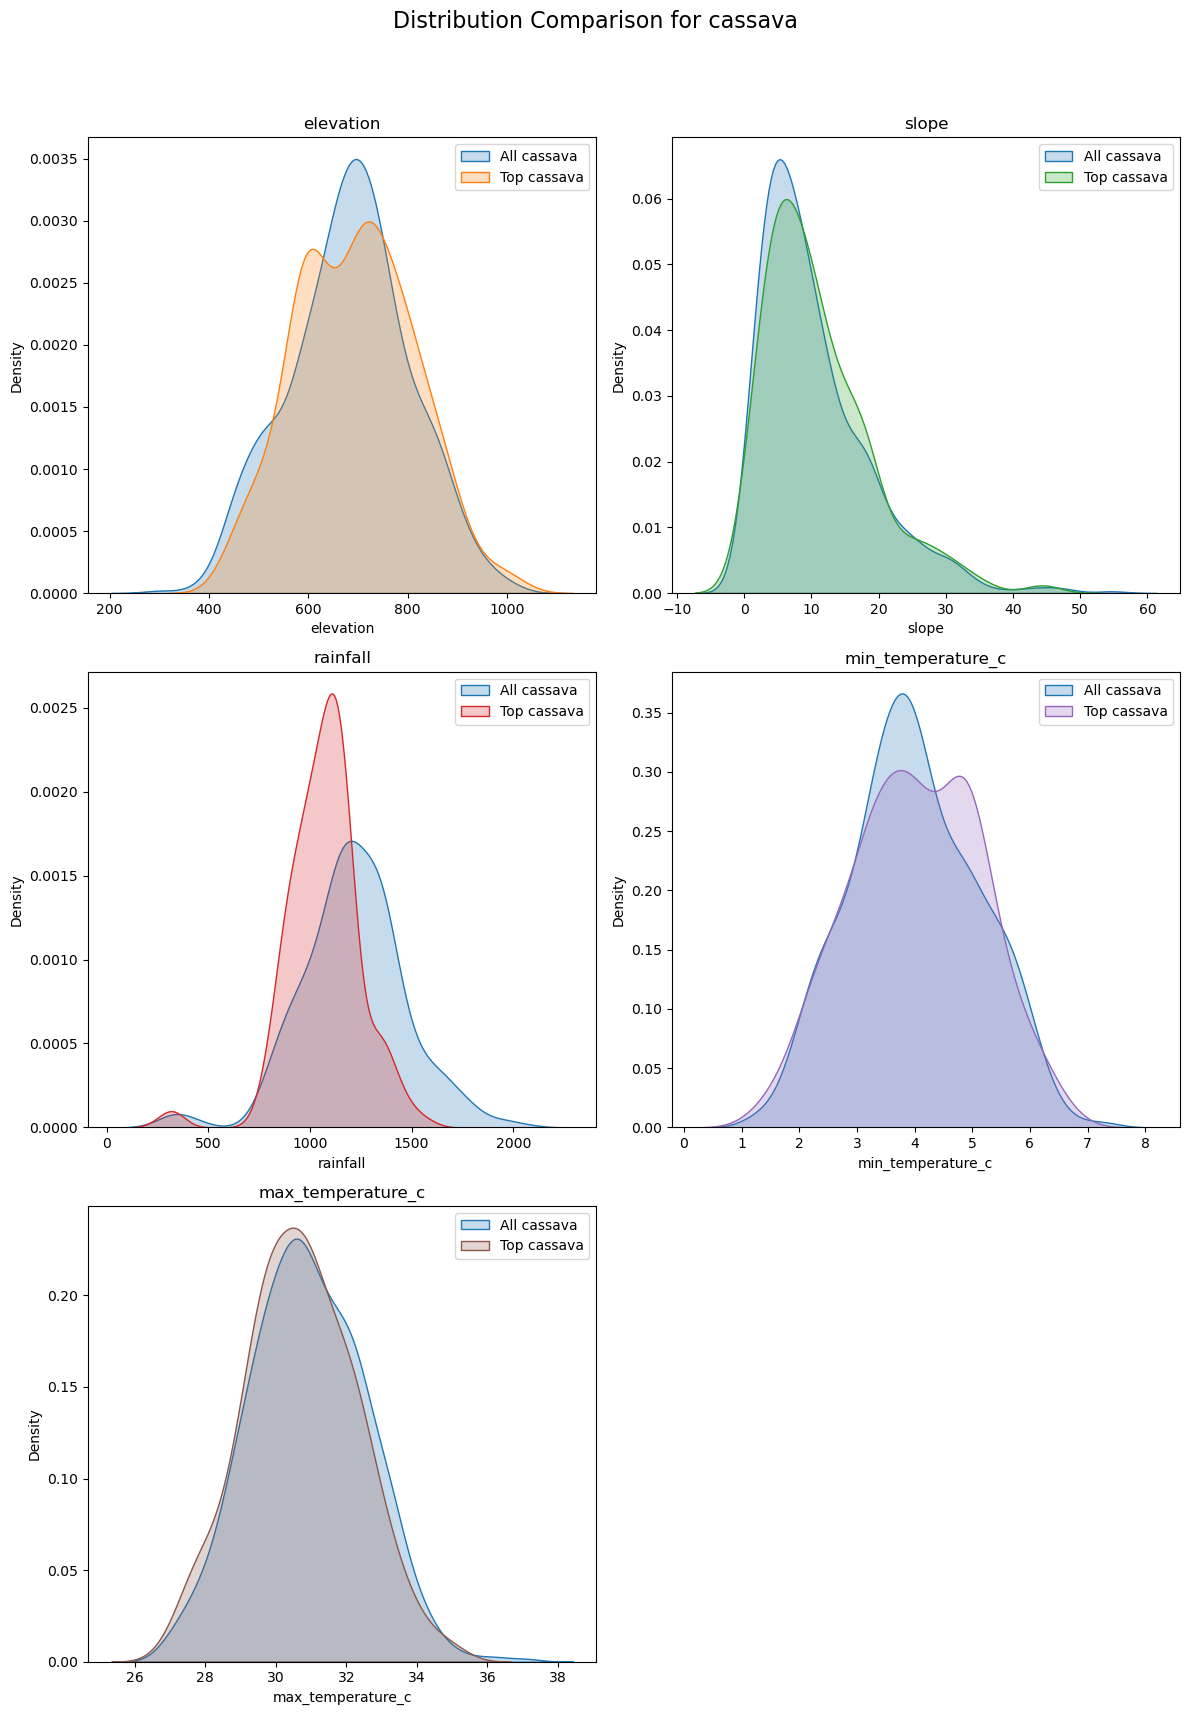

In [29]:
kde_diff_plot("cassava")

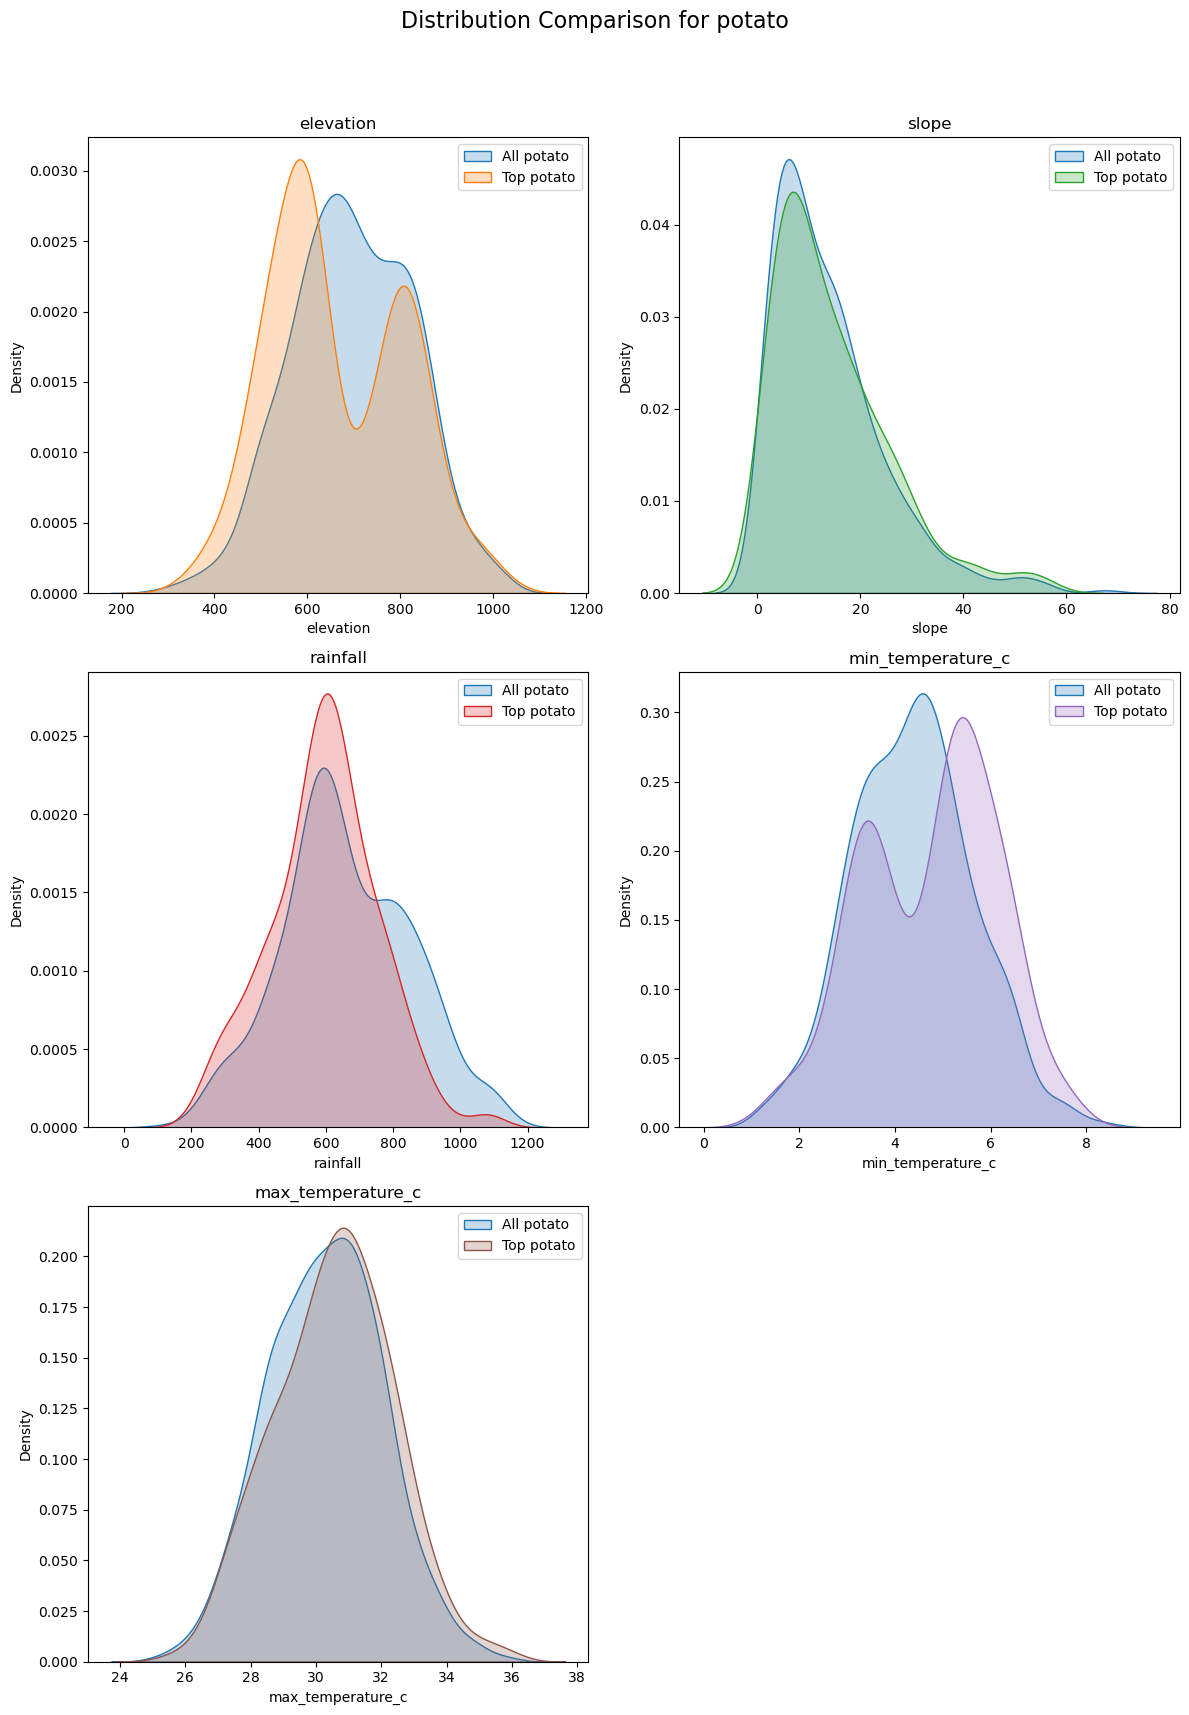

In [30]:
kde_diff_plot("potato")

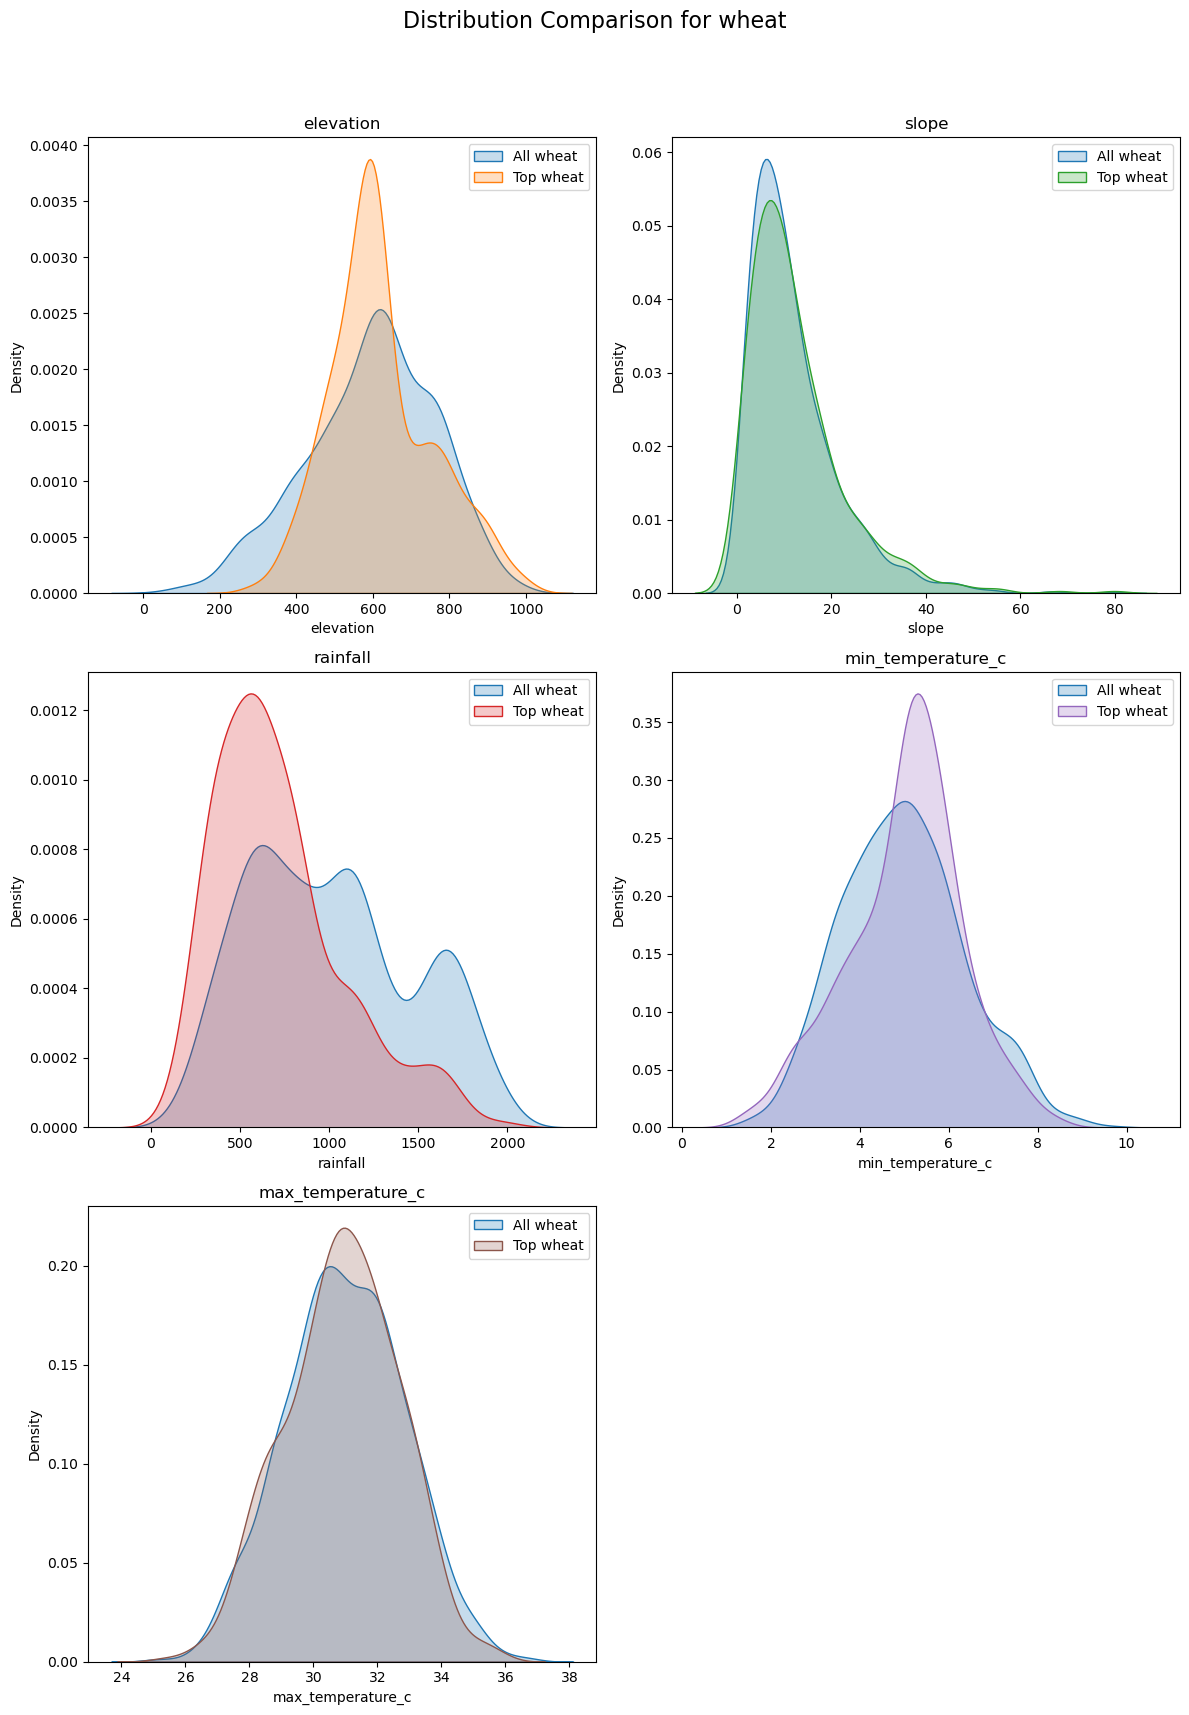

In [31]:
kde_diff_plot("wheat")

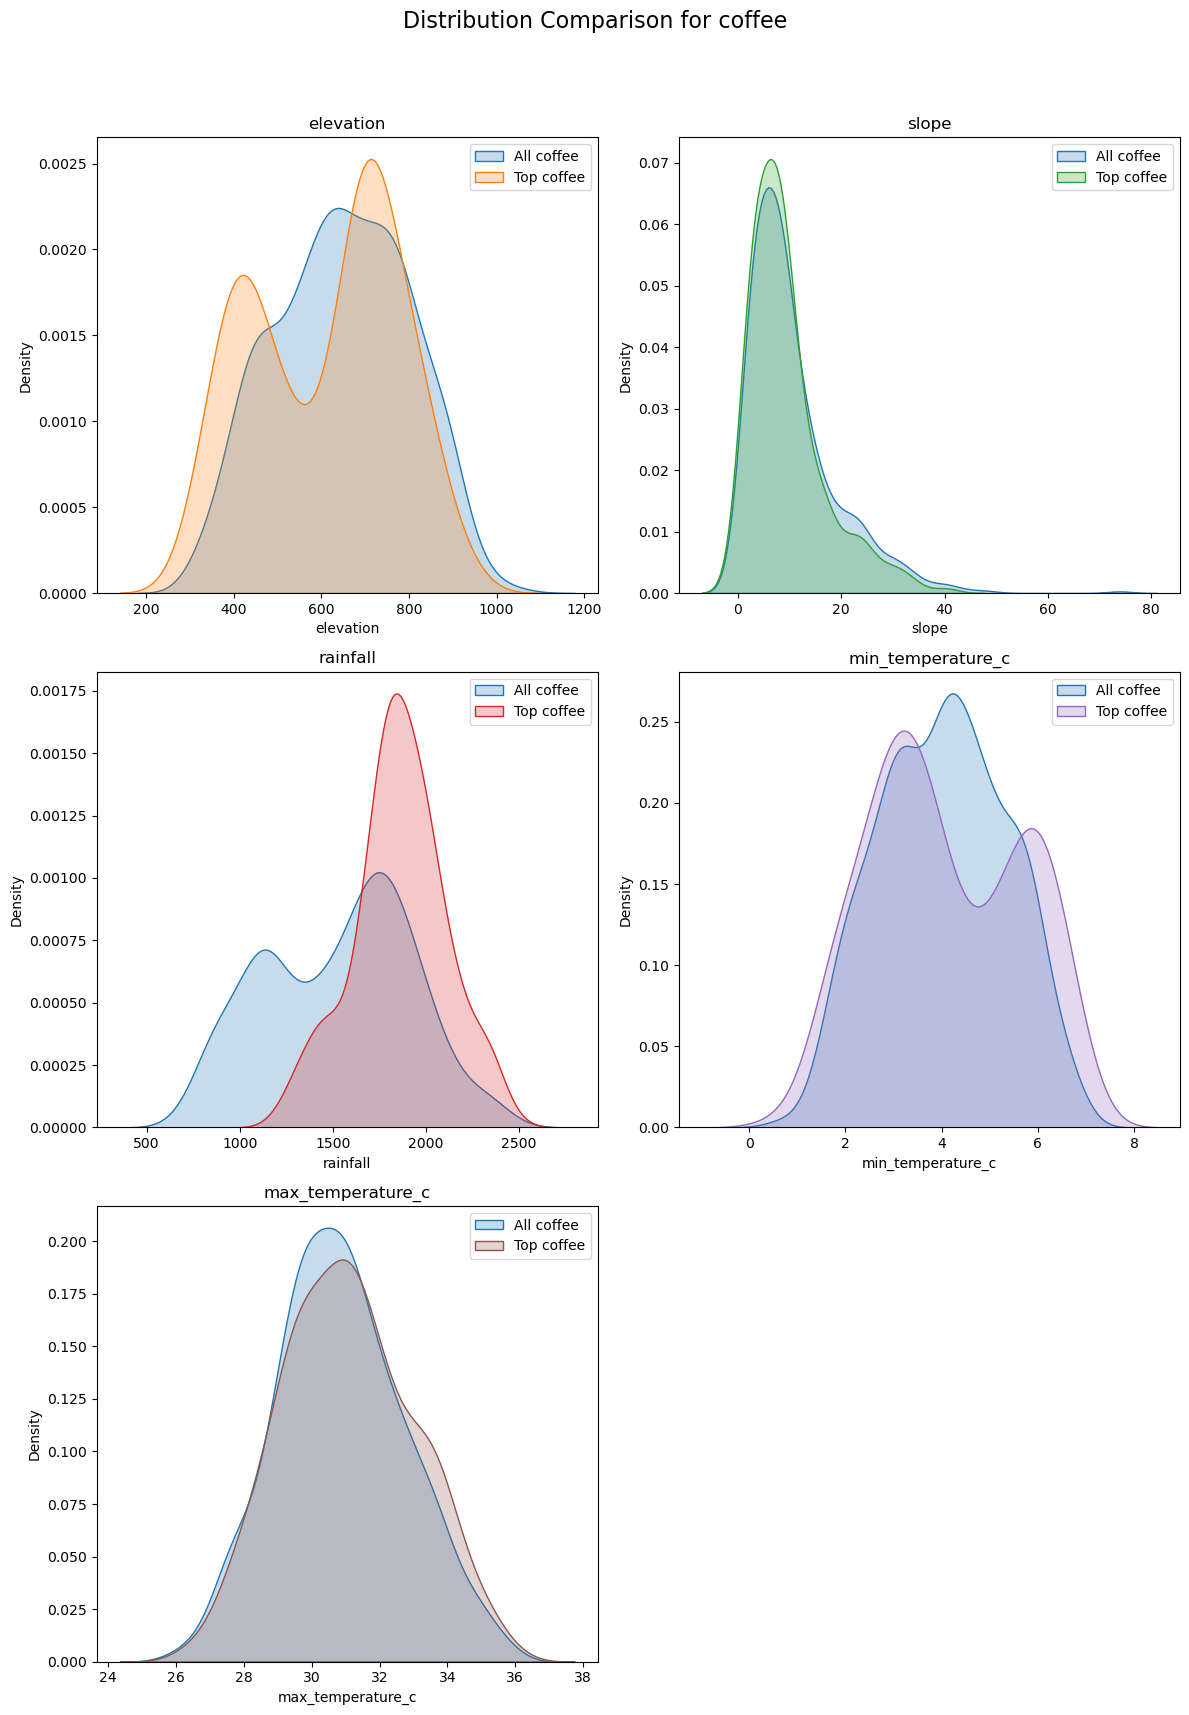

In [32]:
kde_diff_plot("coffee")

#### Key Observations:  

**TEA**
- Top performing tea fields are highly concentrated between ***650-800m***. High altitudes matter, but extreme heights seem less favorable.
- There is ***no major difference in slope*** between top fields and the general data.
- Top fields cluster around a rainfall range of ***1700-2000mm***.
- High yield tea prefers ***moderate cool minimum temperatures*** compared to the wider range in all fields.

**RICE**
- Rice prefers ***mid-altitude areas***, avoiding very high elevations and very low ones. Clusters around ***400-500m***.
- Top performers tend to be on slighltly(only just) steeper grounds than average.
- Prefers high rainfall ***1500-1900mm***.
- Prefers warmer nights(higher minimum temperatures) and warmer day temps(higher maximum temps). Rice prefers ***high temperature areas***.

**BANANA**
- Prefers ***higher altitudes around 600-800m***.
- Top farms clusters around ***rainfall amounts of 1600-2200mm***.
- Preference for ***warmer nights*** and ***consistent temperatures overall***.

**MAIZE**
- Bimodal elevation preference i.e  ***500-700m*** and ***800-900m*** hinting to different maize types.
- Rainfall levels around ***500-800mm***.
- Bimodal night temperature preference i.e ***2-4 degrees*** and ***5-7 degrees***.

**CASSAVA**
- Does well in ***altitudes ranging from 500-900m***.
- ***Moderate rainfall preference 800-1200mm***.
- There are just small subtle differences in temperature between top performing cassava farms and the general spread.

**POTATO**
- Bimodal elevation preference i.e ***500-700m*** and ***800-900m***.
- ***Low to moderate rainfall amounts ranging from 500-800mm***.
- Bimodal night temperatures with ***preference for warmer nights***.
- Consistent ***day temperatures ranging from 30-32 degrees***

**WHEAT**
- Strict preference to ***altitudes between 500-700m***.
- ***Very low to moderate levels of rainfall 200-800mm***. Wheat is drought-resistant.
- Preference for ***very warm nights 4-7 degrees***.

## 2. Soil Conditions

### Box Plot + Summary Tables Analysis

In [33]:
soil_cols = ["soil_fertility", "ph", "pollution_level"]

In [34]:
top_conditions_summary =  top_data.groupby(["crop_type"])[soil_cols].mean().reset_index()
top_conditions_summary

,crop_type,soil_fertility,ph,pollution_level
0,banana,0.659280,5.685862,0.113032
1,cassava,0.606917,5.508157,0.331925
2,coffee,0.661273,5.919279,0.126111
3,maize,0.578333,6.119903,0.156435
4,potato,0.582180,5.493540,0.157427
5,rice,0.647766,5.753037,0.041165
6,tea,0.664344,4.759102,0.139839
7,wheat,0.585238,5.998114,0.168853


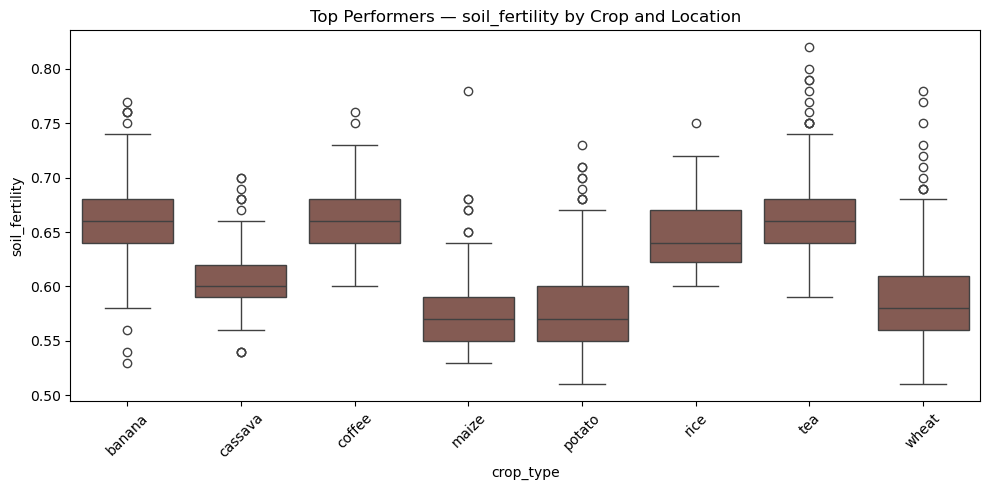

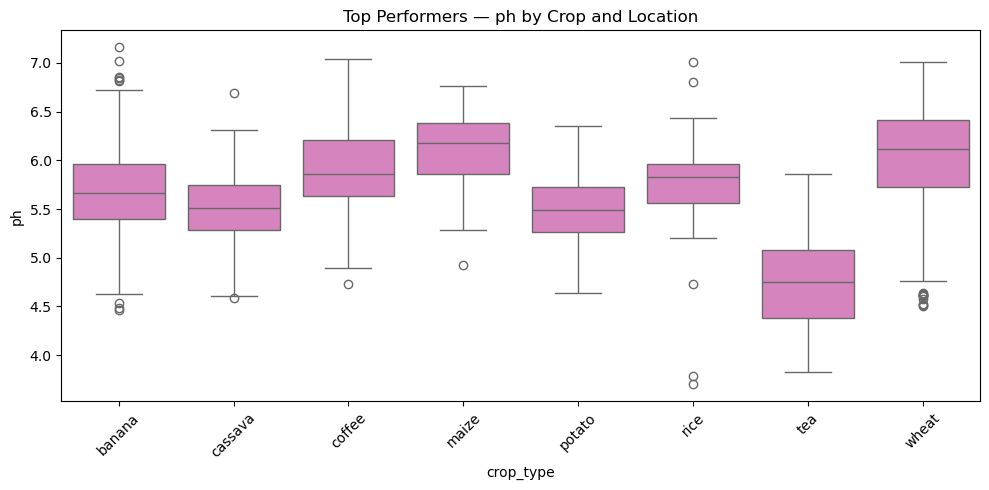

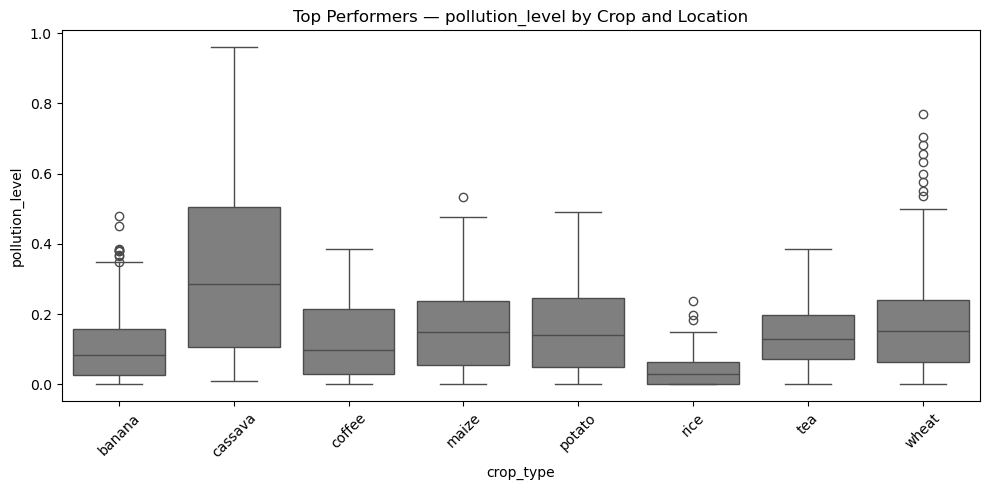

In [35]:
for i, var in enumerate(soil_cols):
    plt.figure(figsize=(10, 5))
    color = sb.color_palette()[i+5]
    sb.boxplot(data=top_data, x="crop_type", y=var, color=color)
    plt.title(f"Top Performers — {var} by Crop and Location")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [36]:
summary = (
    top_data.groupby("crop_type")[soil_cols]
    .agg(["min", "max", "mean"])
)

# Flatten MultiIndex columns
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary

,soil_fertility_min,soil_fertility_max,soil_fertility_mean,ph_min,ph_max,ph_mean,pollution_level_min,pollution_level_max,pollution_level_mean
crop_type,,,,,,,,,
banana,0.53,0.77,0.659280,4.464043,7.161318,5.685862,4.931383e-10,0.480030,0.113032
cassava,0.54,0.70,0.606917,4.585089,6.693400,5.508157,9.880701e-03,0.959926,0.331925
coffee,0.60,0.76,0.661273,4.734754,7.038345,5.919279,9.594640e-10,0.385243,0.126111
maize,0.53,0.78,0.578333,4.930627,6.764293,6.119903,6.847646e-04,0.532389,0.156435
potato,0.51,0.73,0.582180,4.640159,6.349113,5.493540,1.001565e-03,0.489920,0.157427
rice,0.60,0.75,0.647766,3.700337,7.008728,5.753037,7.441171e-10,0.236623,0.041165
tea,0.59,0.82,0.664344,3.831955,5.859675,4.759102,4.663686e-09,0.386640,0.139839
wheat,0.51,0.78,0.585238,4.504278,7.007183,5.998114,5.927782e-09,0.769292,0.168853


#### Key Observations:
**SOIL FERTILITY**  

- `Coffee`, `Rice` and `Tea` crave for higher soil fertility levels.
- `Wheat` farms that do well are distributed in a broad range of soil fertility levels showing that it can do well in various levels.

**pH**
- `Tea` leans towards stronger acidic conditions.
- `Maize` and `Rice` farms with high yields tend to avoid highly acidic conditions having pH floors of ~ 5.3

**POLLUTION**
- `Cassava` is the most pollution-resistant crop in Maji Ndogo. Top performing cassava fields have very high pollution levels compared to other crops
- `Wheat` is also pollution-resistant as it also thrives in a broad range of pollution levels.
- Top performing `Rice` farms have the least pollution levels.


### KDE Distribution Analysis

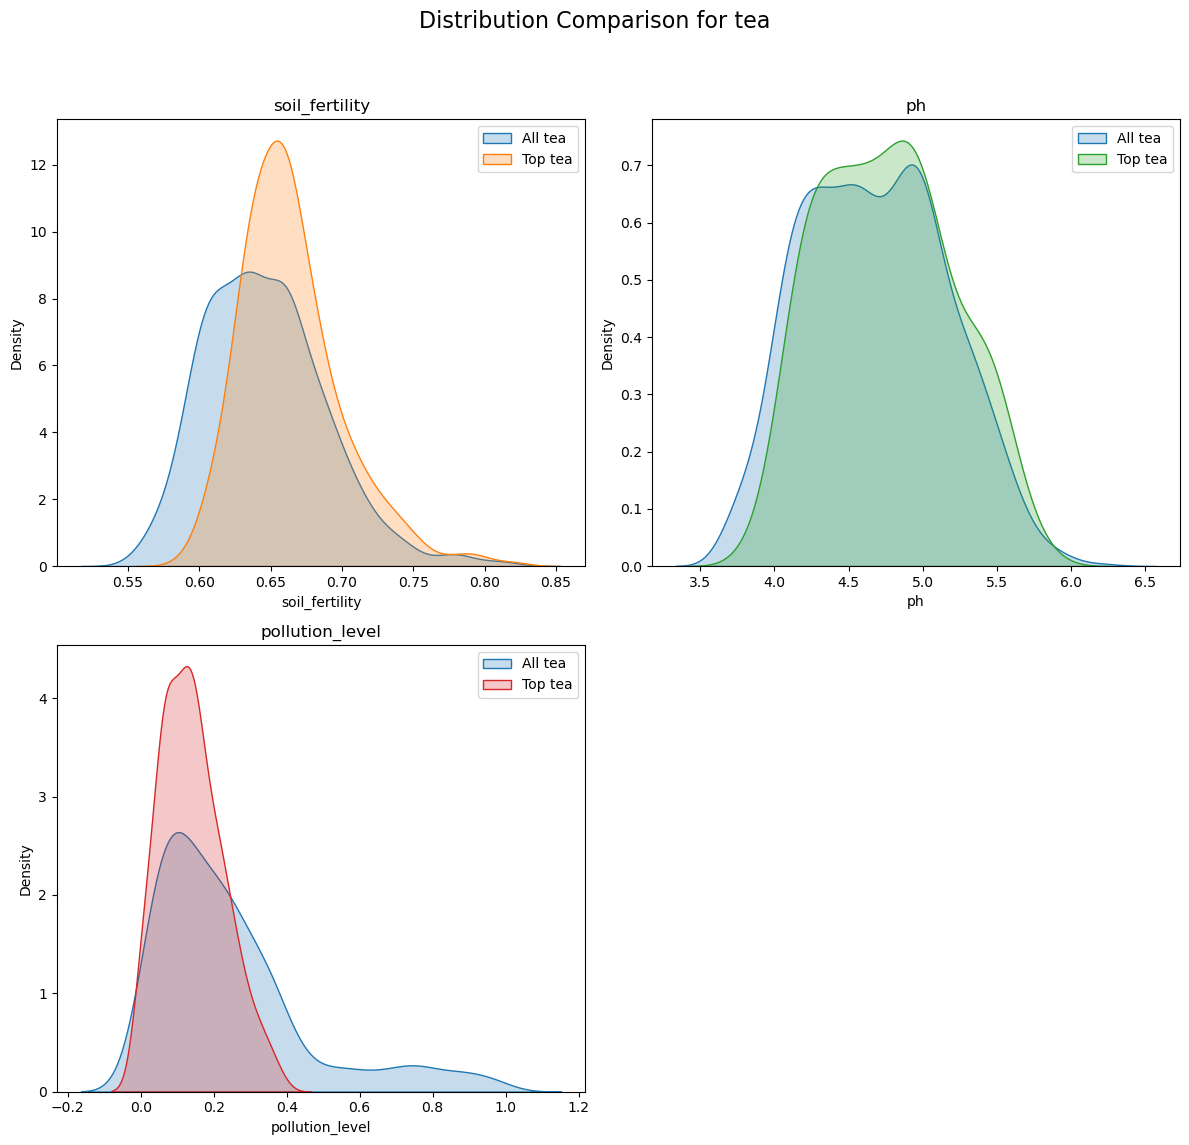

In [37]:
kde_diff_plot("tea", vars=soil_cols)

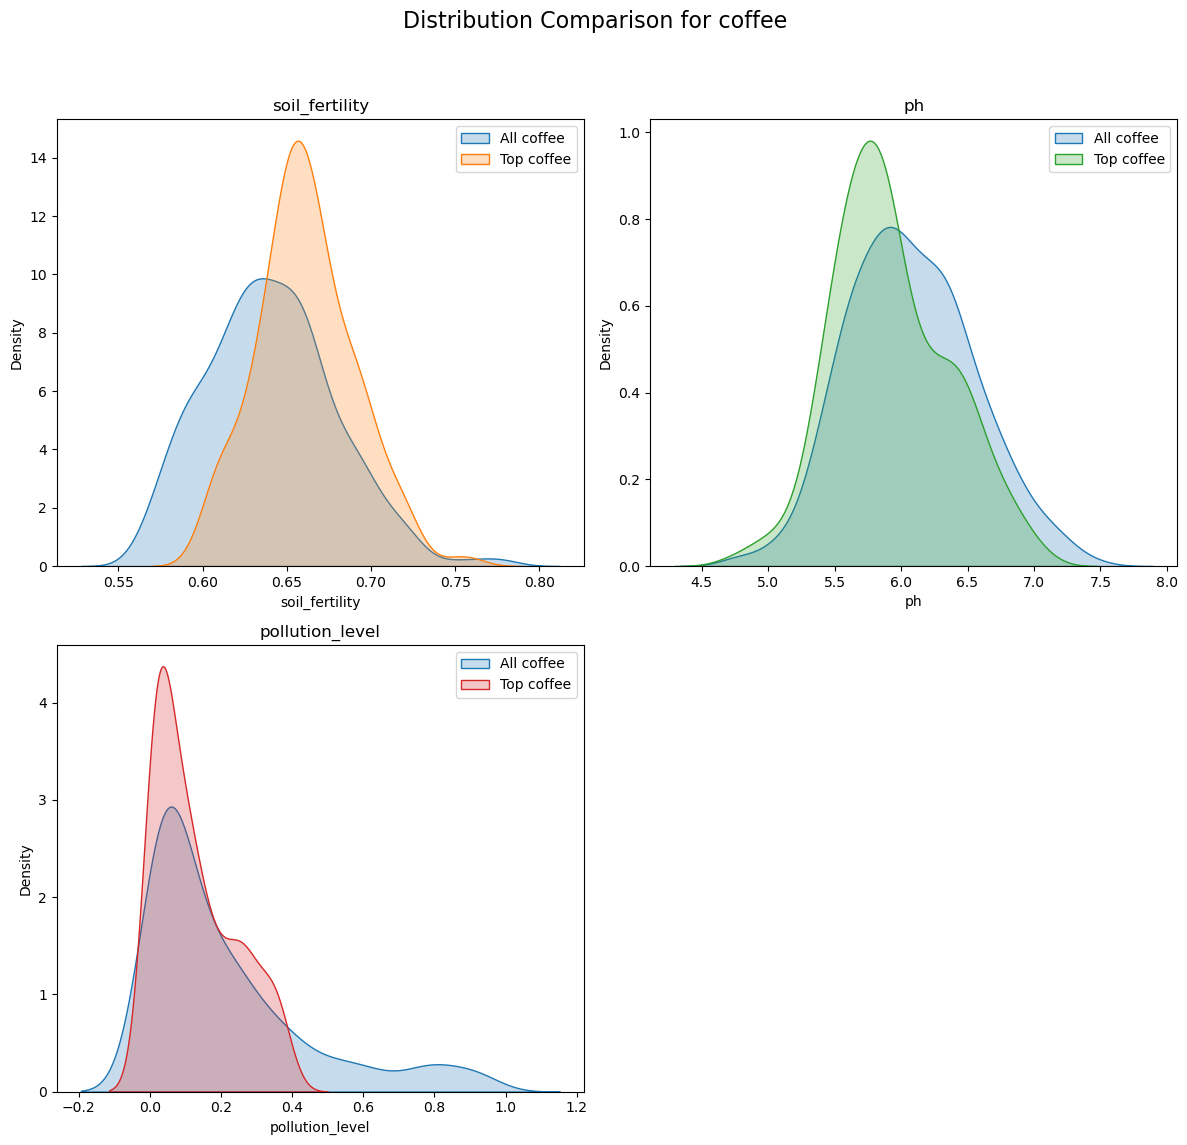

In [38]:
kde_diff_plot("coffee", vars=soil_cols)

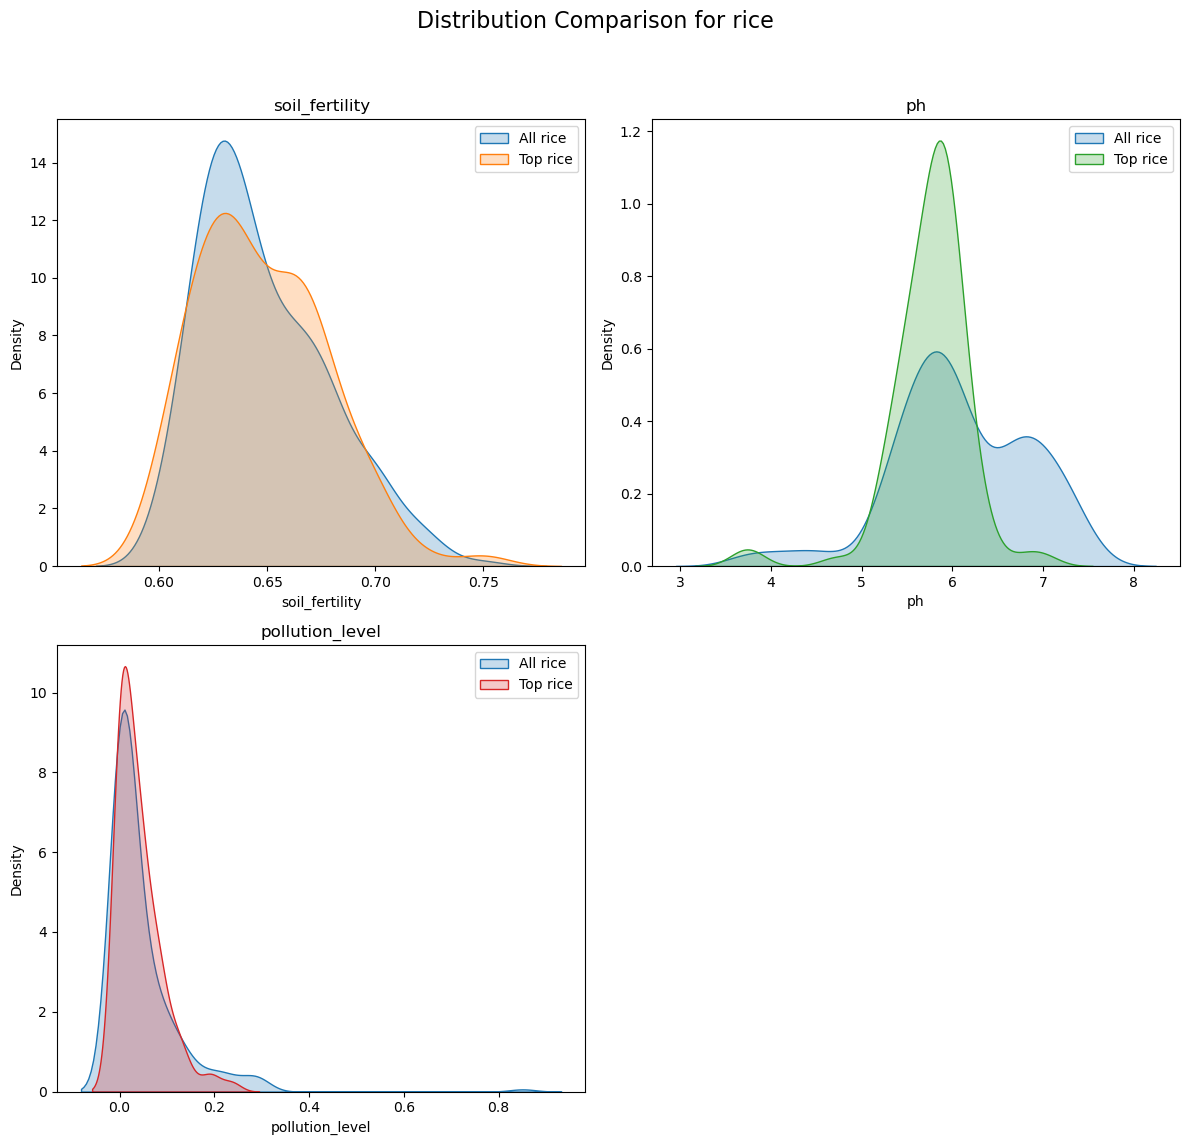

In [39]:
kde_diff_plot("rice", vars=soil_cols)

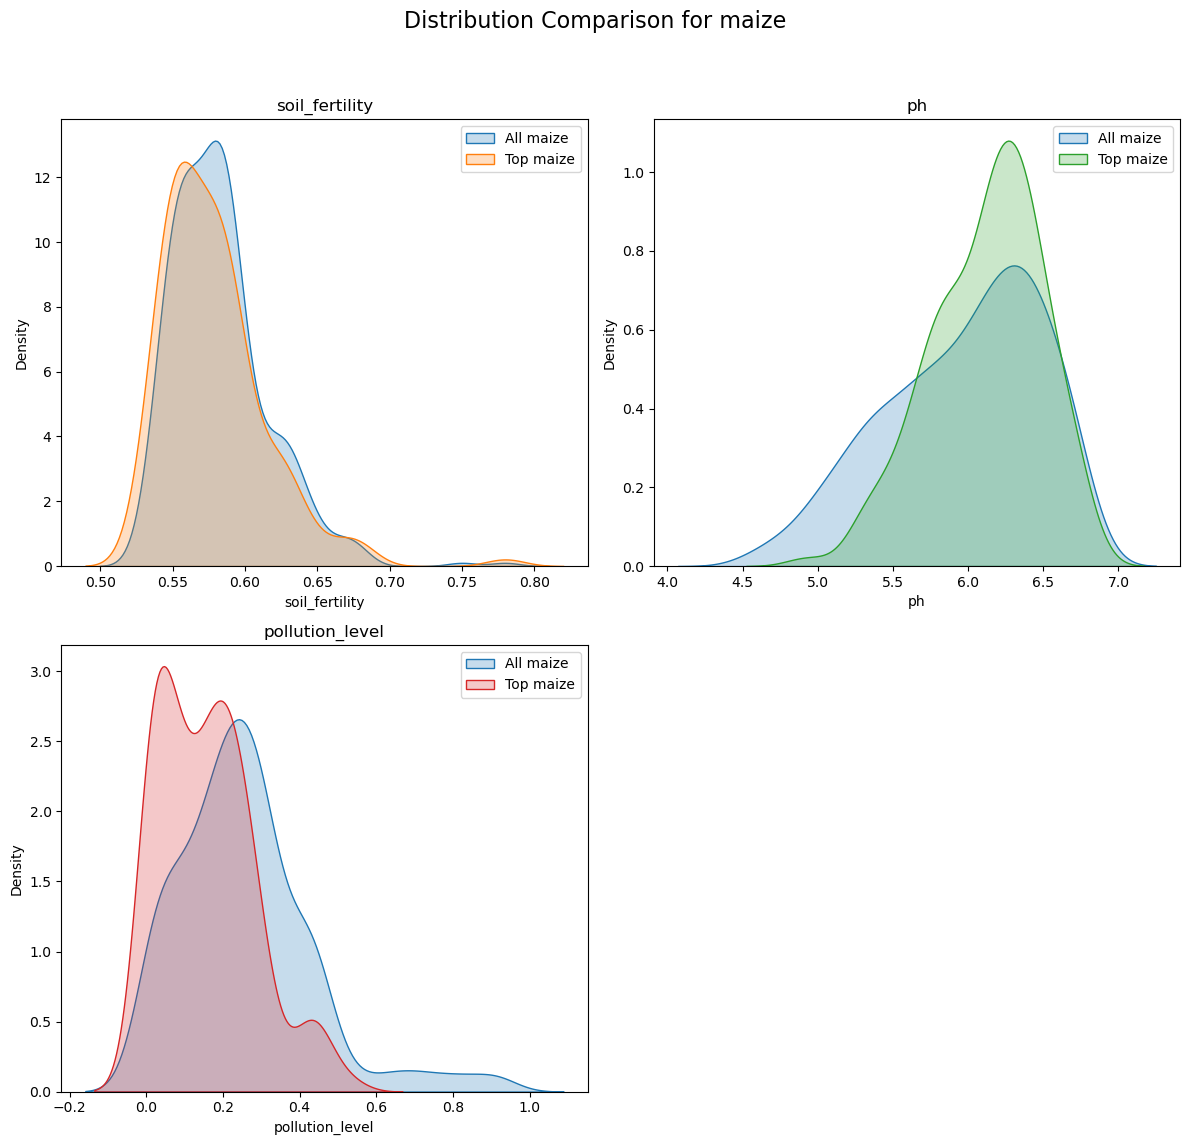

In [40]:
kde_diff_plot("maize", vars=soil_cols)

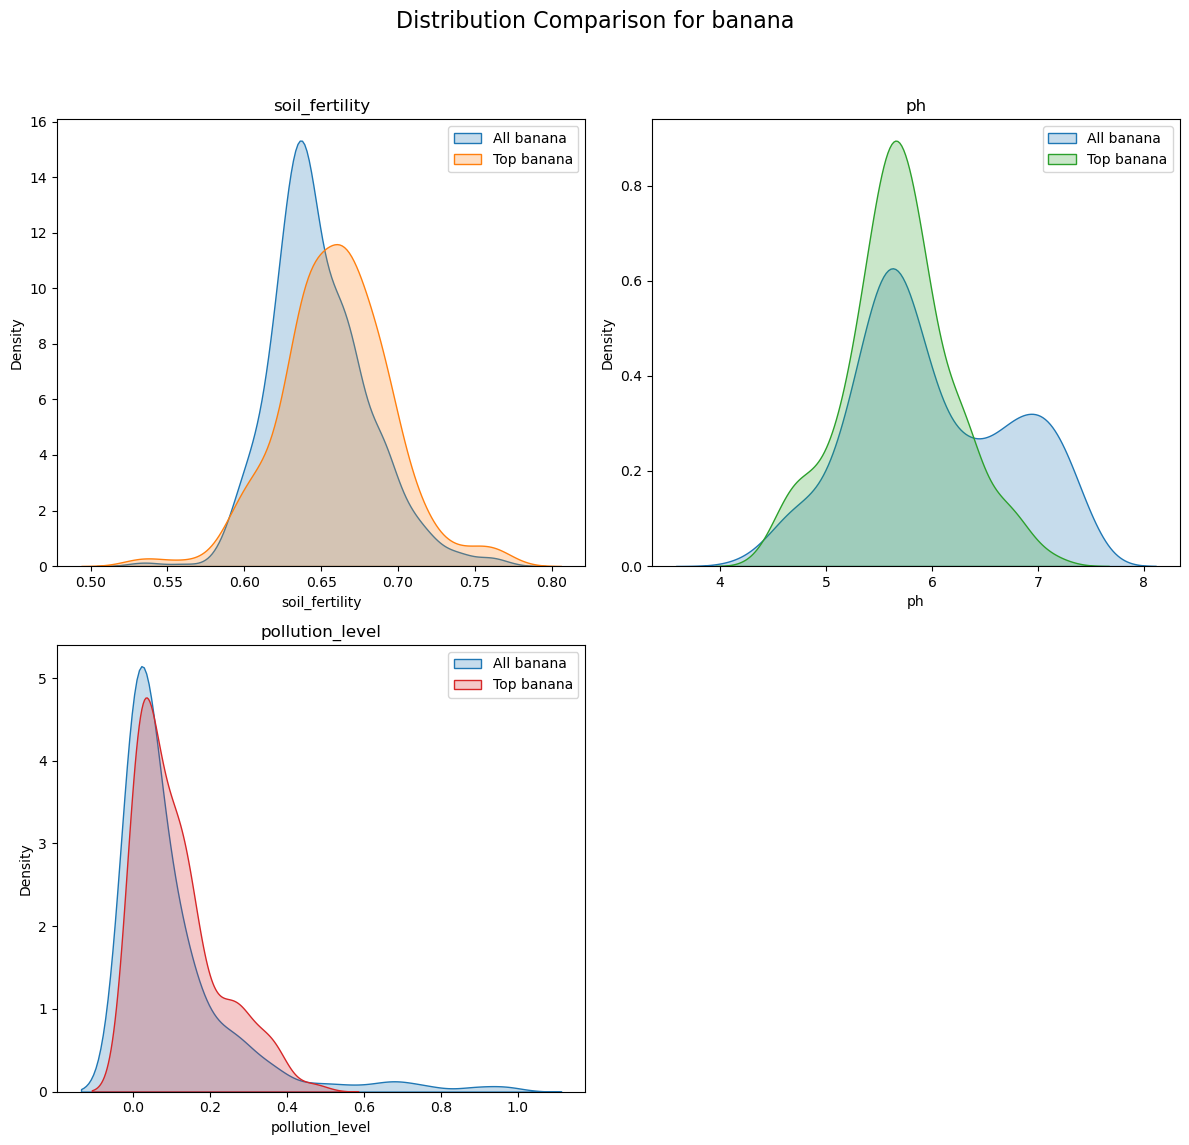

In [41]:
kde_diff_plot("banana", vars=soil_cols)

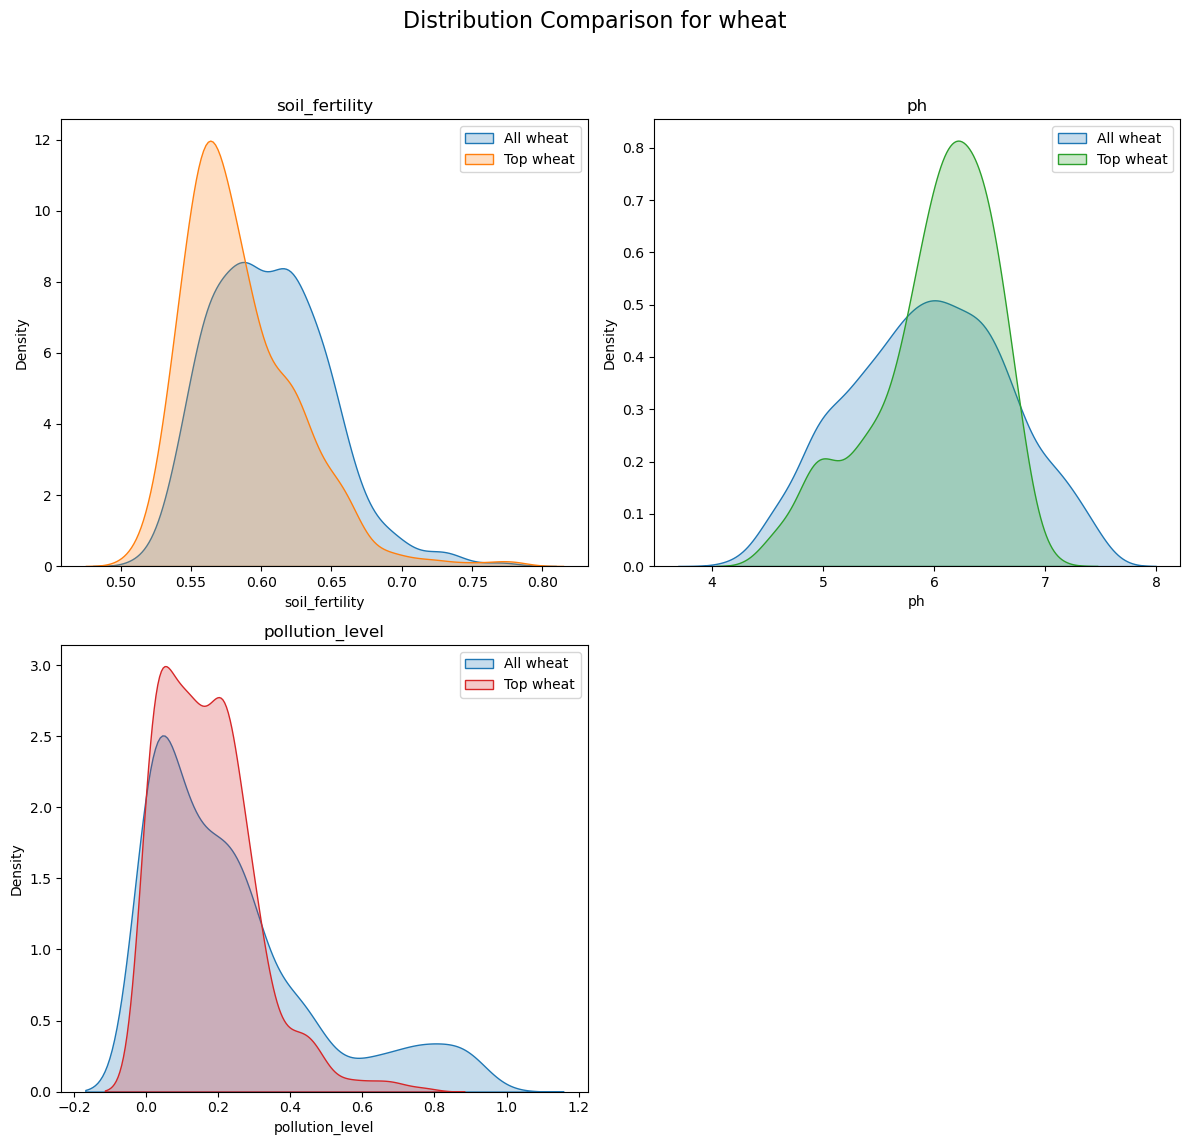

In [42]:
kde_diff_plot("wheat", vars=soil_cols)

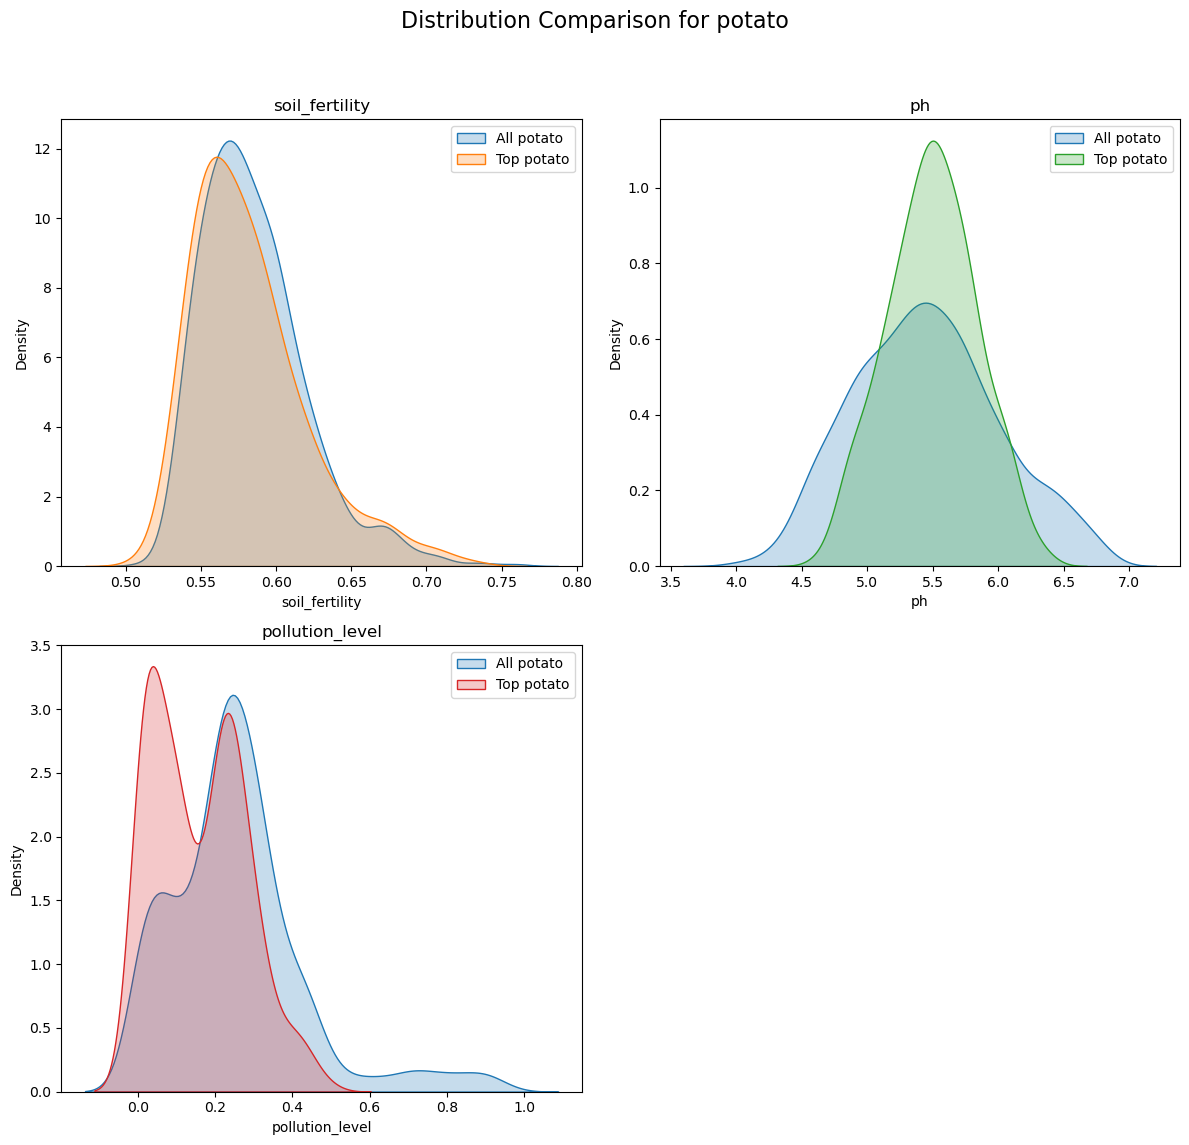

In [43]:
kde_diff_plot("potato", vars=soil_cols)

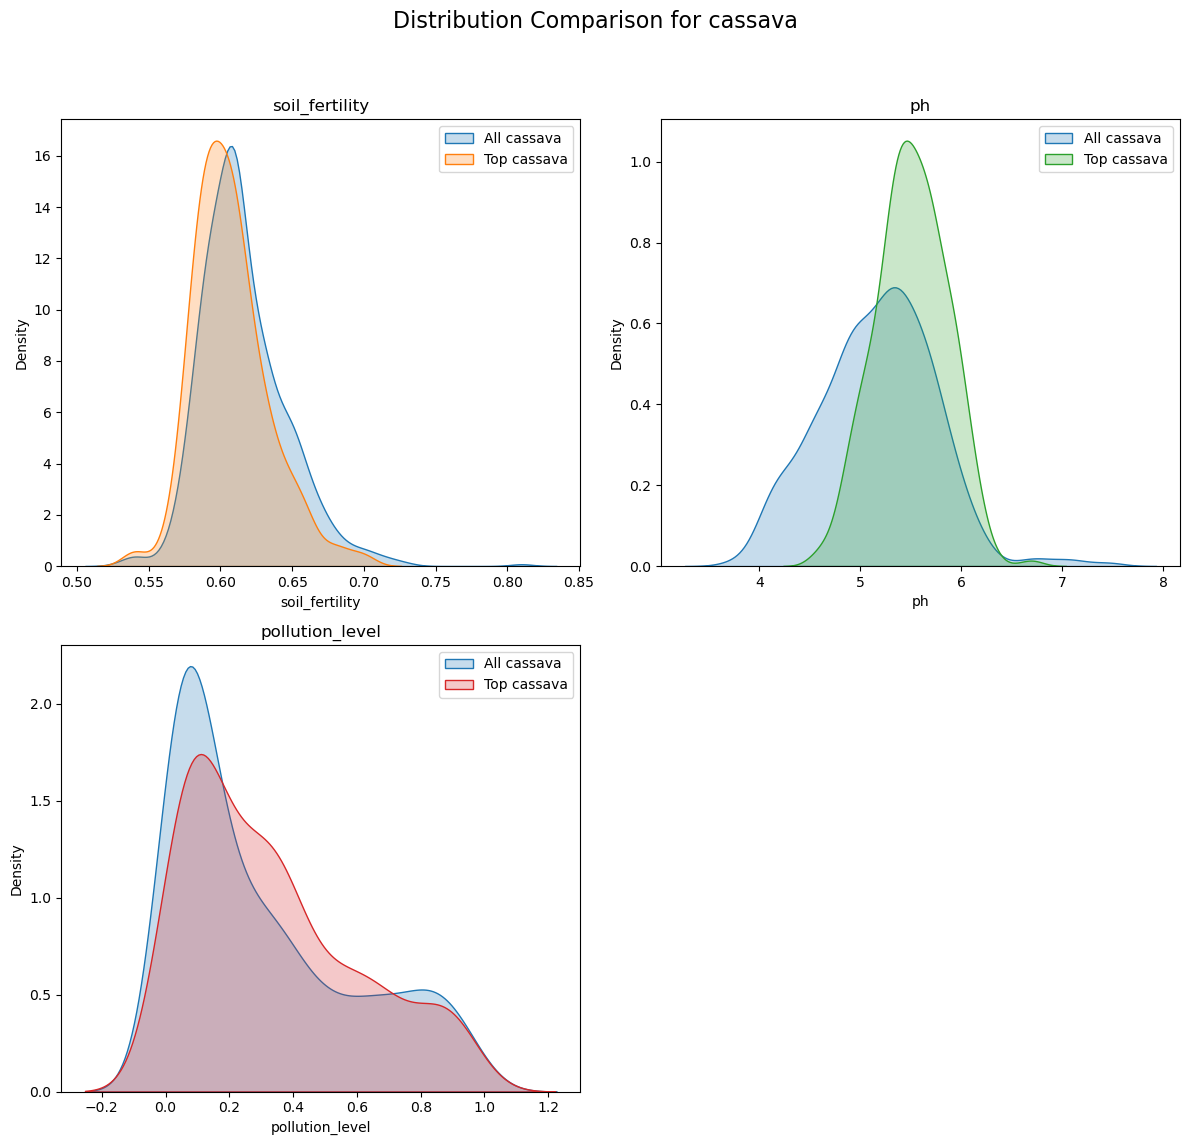

In [44]:
kde_diff_plot("cassava", vars=soil_cols)

#### Key Observations:
- `Wheat` does not necessarily require high soil fertility. It thrives best in averagely fertile grounds.
- `Wheat` and `Cassava` do well even in high levels of pollution.
- `Rice` and `Maize` prefer pH levels around 5.5-6.5 suggesting preference to more neutral conditions.
- `Tea`, `Coffee` and `Rice` prefer very fertile lands.
- `Banana` and `Cassava` also prefer mildly acidic to neutral soils.


### Soil Type Analysis

In [45]:
# Group total counts for each crop-soil combo
all_counts = data.groupby(['crop_type', 'soil_type']).size().rename("total")

# Group top-performing counts
top_counts = top_data.groupby(['crop_type', 'soil_type']).size().rename("top")

# Combine them into one DataFrame
soil_summary = pd.concat([all_counts, top_counts], axis=1).fillna(0)

# Convert 'top' from float (after fillna) to int 
soil_summary["top"] = soil_summary["top"].astype(int)

# Compute % success rate
soil_summary["% success"] = round((soil_summary["top"] / soil_summary["total"]) * 100, 2)

soil_summary


total  top  % success
crop_type soil_type                       
banana    Loamy         24   13      54.17
          Peaty         42   10      23.81
          Silt         420   99      23.57
          Volcanic     147  114      77.55
cassava   Loamy        111   92      82.88
          Peaty         61    0       0.00
          Rocky         33    9      27.27
          Sandy        181  116      64.09
          Silt          44    1       2.27
          Volcanic     242   35      14.46
coffee    Loamy         38    0       0.00
          Peaty          1    0       0.00
          Rocky         24    0       0.00
          Sandy        109    0       0.00
          Silt         254  100      39.37
          Volcanic     181  120      66.30
maize     Loamy        137  100      72.99
          Rocky         20   15      75.00
          Sandy        242   29      11.98
potato    Loamy        274  167      60.95
          Rocky         92   11      11.96
          Sandy        457  111      24.29
rice      Peaty         23   12      52.17
          Silt         237   79      33.33
          Volcanic       5    3      60.00
tea       Loamy          8    0       0.00
          Peaty         10    1      10.00
          Rocky         73    0       0.00
          Sandy         92    0       0.00
          Silt           4    2      50.00
          Volcanic     726  340      46.83
wheat     Loamy        381  280      73.49
          Peaty         33    0       0.00
          Rocky         62   30      48.39
          Sandy        482  122      25.31
          Silt         356   49      13.76
          Volcanic      28    2       7.14

#### Key Observations:
- `Banana` does well in a variety of soil types but shows high preference for ***volcanic and loamy soils***
- `Cassava` and `Potato` prefer ***loamy and sandy soils***.
- `Coffee` will only perform on ***silt and volcanic soils*** with ***volcanic*** soils being most preferred.
- `Tea` performs on ***volcanic*** soils.
- `Wheat` performs on a variety of soils but most preferrably ***loamy*** soils.

# CONCLUSION

| Crop      | Altitude (m)         | Rainfall (mm)       | Night Temp Preference     | Day Temp Preference           | Soil Type Preference                     | Soil pH Preference        | Soil Fertility Preference     | Pollution Tolerance          |
|-----------|----------------------|----------------------|----------------------------|-------------------------------|-------------------------------------------|---------------------------|-------------------------------|------------------------------|
| **Tea**      | 650–800 (optimal)    | 1700–2000             | Moderate cool              | 28–33°C (Moderately Warm–Warm) | Volcanic                                 | 4.5–5.5                   | Very fertile                  | Low                          |
| **Rice**     | 400–500              | 1500–1900             | Warm nights                | 30–35°C (Warm–Very Warm)       | Loamy, neutral                            | 5.5–6.5                   | Very fertile                  | Low                          |
| **Banana**   | 600–800              | 1600–2200             | Warm nights                | 30–35°C (Warm–Very Warm)       | Volcanic, loamy                           | Mildly acidic–neutral     | Moderately fertile            | Moderate                     |
| **Maize**    | 500–700 & 800–900    | 500–800               | Bimodal: 2–4°C & 5–7°C     | 29–33°C (Warm)                 | Loamy                                     | 5.5–6.5                   | Very fertile                  | Low                          |
| **Cassava**  | 500–900              | 800–1200              | Slight variations          | 29–33°C (Warm)                 | Loamy, sandy                              | Mildly acidic–neutral     | Low fertility needed          | High                         |
| **Potato**   | 500–700 & 800–900    | 500–800               | Warmer nights (bimodal)    | 30–33°C (Warm)                 | Loamy, sandy                              | 5.0–6.0                   | Moderately fertile            | Moderate                     |
| **Wheat**    | 500–700              | 200–800               | Very warm (4–7°C)          | 30–33°C (Warm)                 | Loamy (variety of soils)                  | 6.0–7.0                   | Average fertility             | High                         |
| **Coffee**   | 600–900              | 1700–2200             | 5–7°C (warm nights)        | 28–34°C (Moderately Warm–Very Warm) | Silt, volcanic (prefers volcanic)         | 5.0–6.0                   | Very fertile                  | Low                          |
